In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')
import seaborn as sns

pd.set_option("display.float_format", "{:.2f}".format)
#plt.style.use("seaborn-white")
sns.set_style("white")
plt.rcParams.update({'font.size': 18}) # Set the font size for all element
import warnings
warnings.filterwarnings('ignore')

# Load data and Visulazation

In [73]:
df = pd.read_excel("/content/sample_data/Q T2,3 &T9, 10.xlsx", sheet_name = 'data')
df.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,39.91,9.35,2.58,5.00,0.72,3.45,0.72
std,22.70,3.84,0.52,1.84,0.21,1.32,0.75
min,10.00,1.00,1.50,2.00,0.33,2.50,0.03
25%,10.00,6.00,2.00,3.00,0.66,2.50,0.17
50%,42.00,9.00,3.00,4.00,0.66,2.50,0.33
75%,60.00,12.00,3.00,6.00,1.00,5.00,1.00
max,80.00,24.00,3.00,8.00,1.00,7.50,2.64


In [74]:
column = ['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']
data = df[column]

In [75]:
data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,55.00,55.00,55.00,55.00,55.00,55.00,55.00
mean,39.91,9.35,2.58,5.00,0.72,3.45,0.72
std,22.70,3.84,0.52,1.84,0.21,1.32,0.75
min,10.00,1.00,1.50,2.00,0.33,2.50,0.03
25%,10.00,6.00,2.00,3.00,0.66,2.50,0.17
50%,42.00,9.00,3.00,4.00,0.66,2.50,0.33
75%,60.00,12.00,3.00,6.00,1.00,5.00,1.00
max,80.00,24.00,3.00,8.00,1.00,7.50,2.64


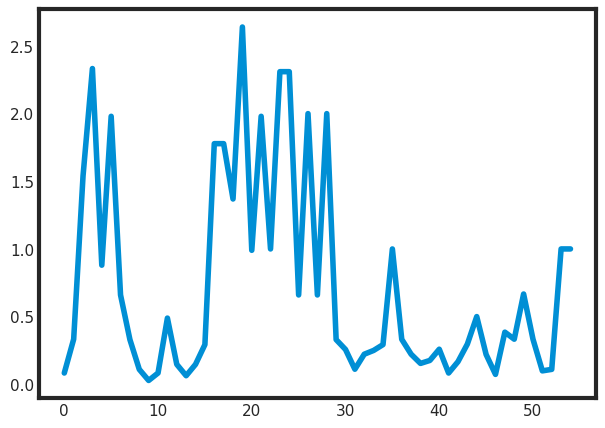

In [76]:
plt.plot(data['Q'])

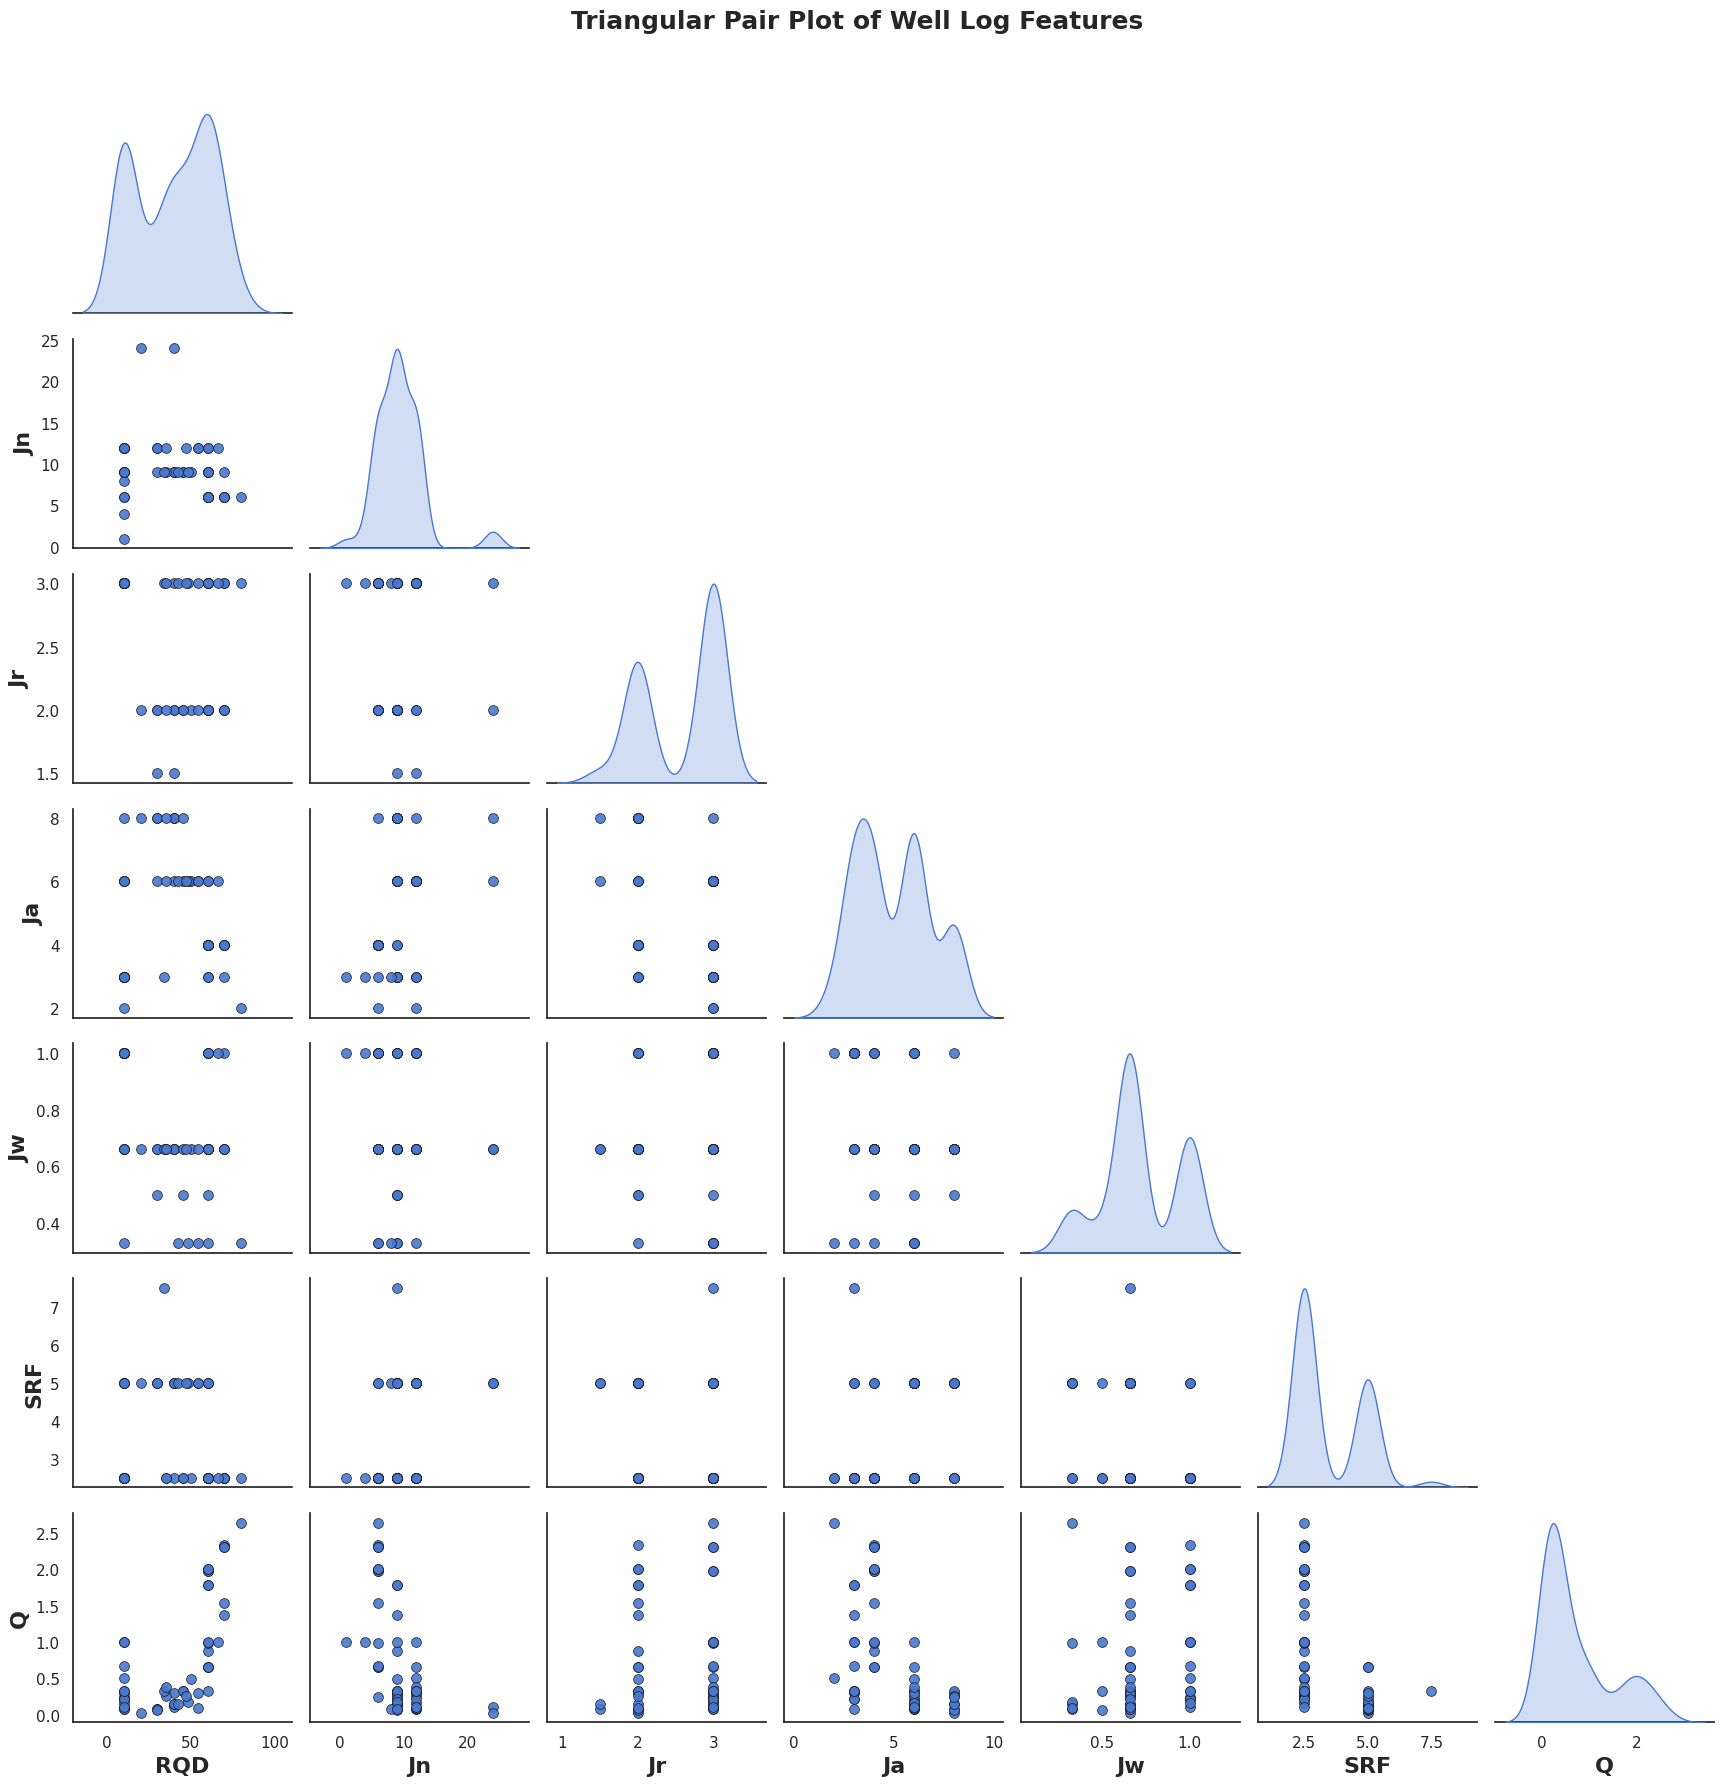

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined with the required columns
w = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']]

# Set the fivethirtyeight style with a muted palette
sns.set(style="white", palette="muted")

# Create a triangular pair plot (lower triangle only)
pair_plot = sns.pairplot(
    w,
    diag_kind='kde',  # Kernel density estimate for diagonal
    plot_kws={'alpha': 0.9, 's': 50, 'edgecolor': 'k'},  # Scatter plot settings
    diag_kws={'shade': True, 'bw_adjust': 0.8},  # KDE settings
    markers='o',
    height=2.5,  # Size of the plots
    corner=True  # Only show the lower triangle
)

# Add a title to the entire pair plot
pair_plot.fig.suptitle("Triangular Pair Plot of Well Log Features", fontsize=18, fontweight='bold', y=1.02)

# Adjust the axis label and tick properties for all axes
for ax in pair_plot.axes.flat:
    if ax is not None:
        # Bold and larger font for axis labels
        ax.xaxis.label.set_size(16)
        ax.yaxis.label.set_size(16)
        ax.xaxis.label.set_weight('bold')
        ax.yaxis.label.set_weight('bold')

        # Increase tick label size and make them bold
        #ax.set_xticklabels(ax.get_xticklabels(), fontsize=11)
        #ax.set_yticklabels(ax.get_yticklabels(), fontsize=11)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

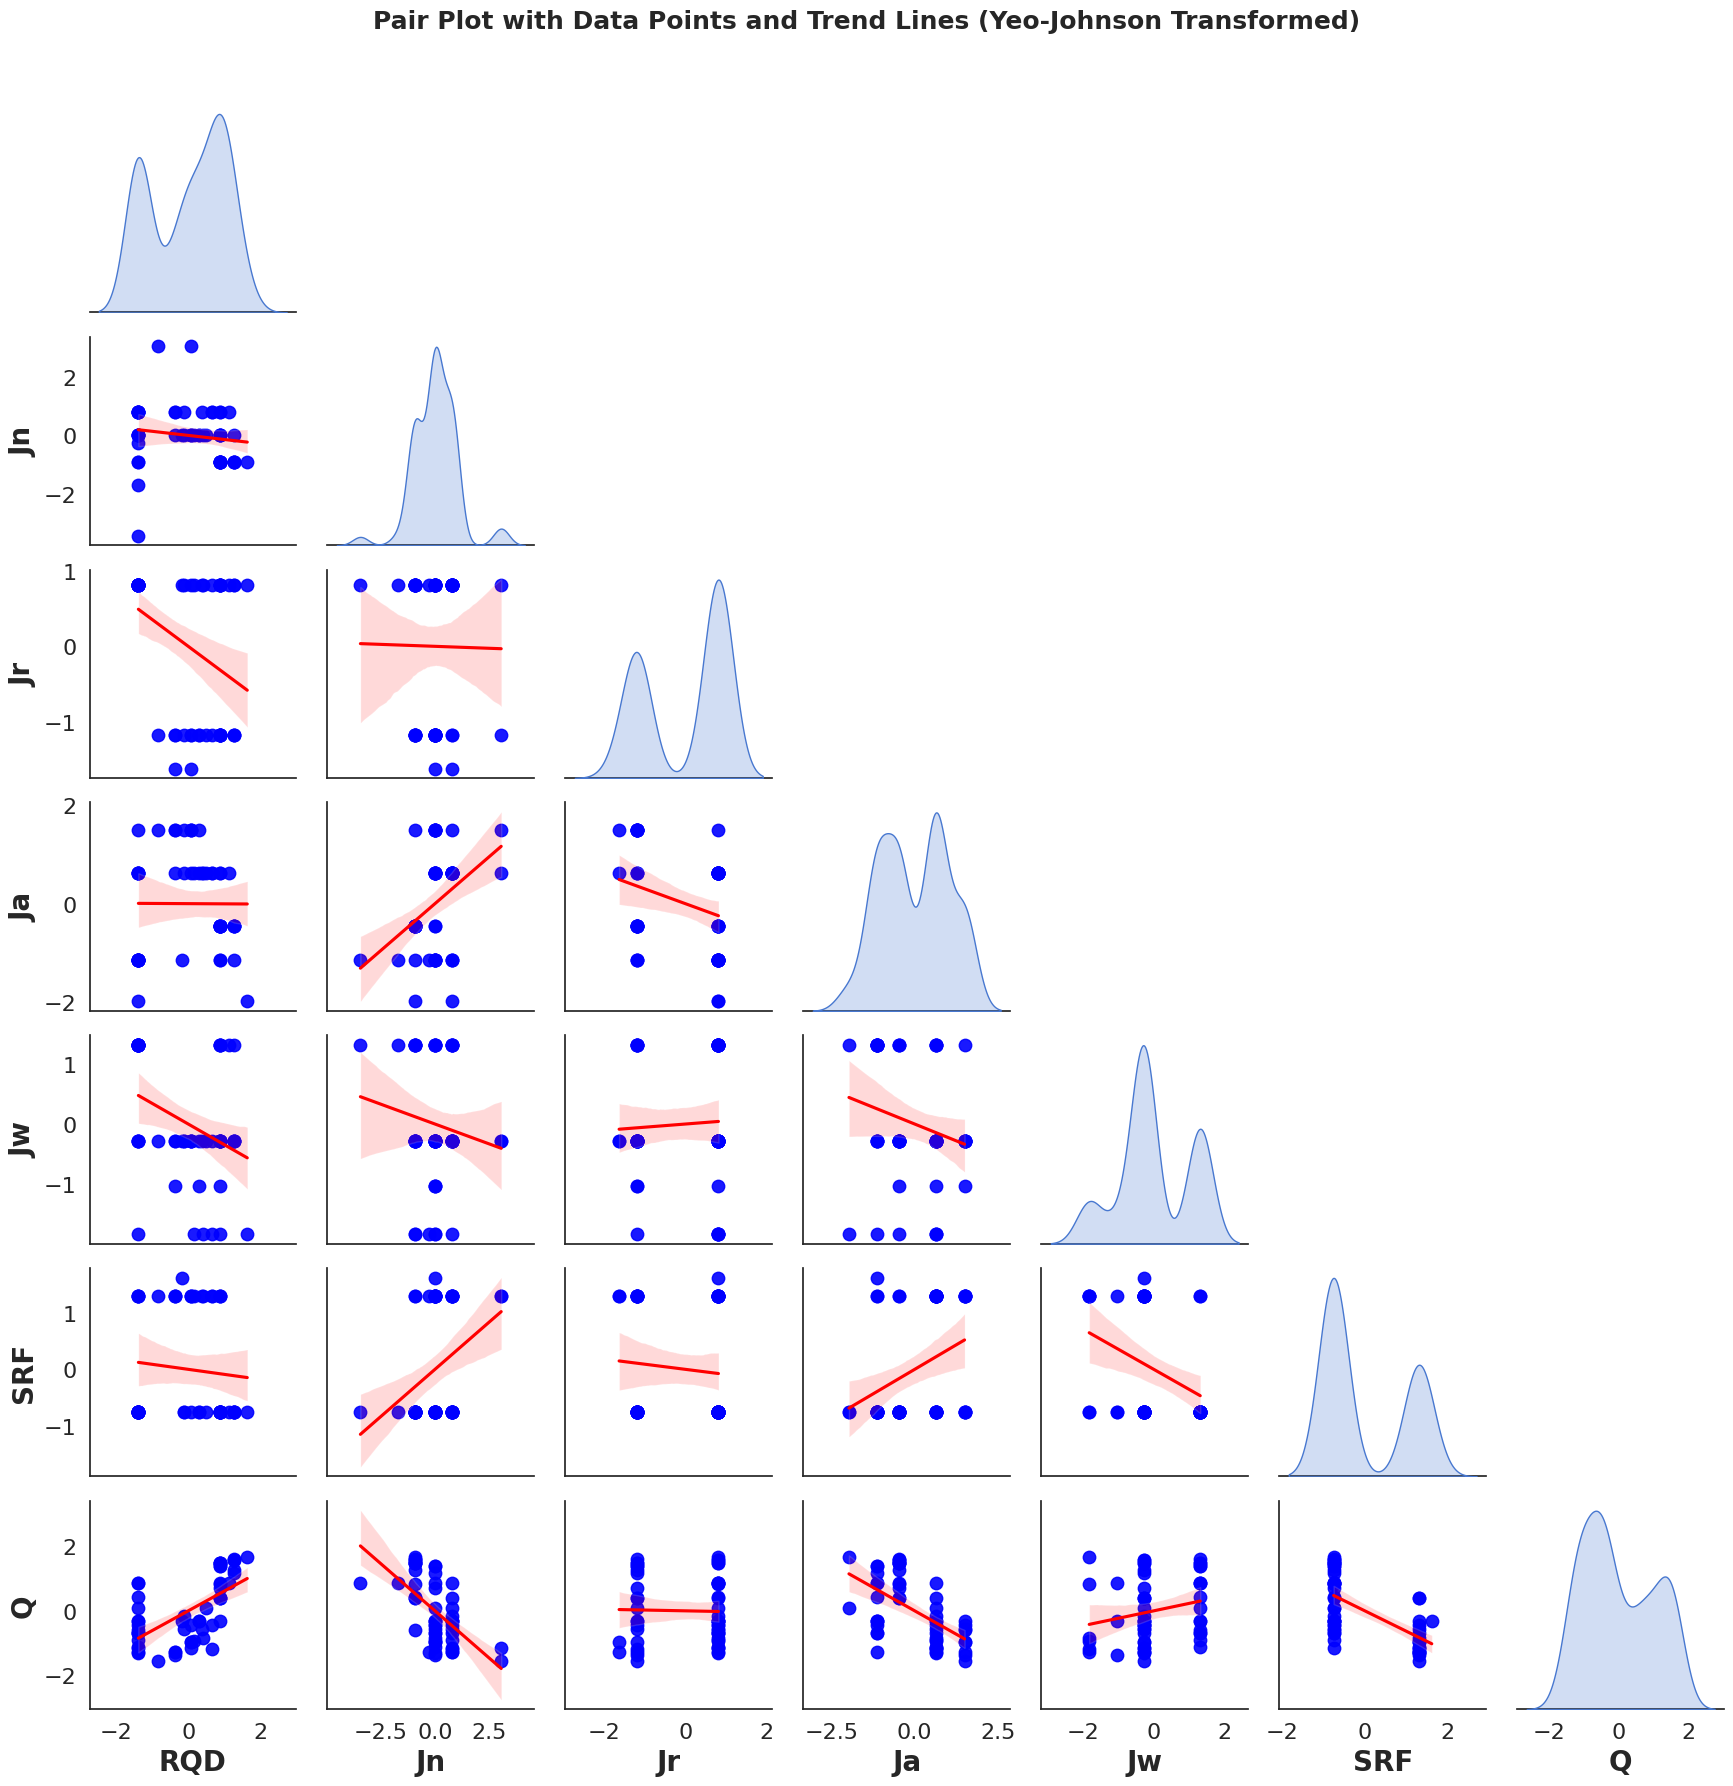

In [78]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Selecting the required columns from well_1_smoothed
w = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']]

# Applying Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')
w_transformed = transformer.fit_transform(w)

# Creating a new DataFrame with transformed data
w_transformed_df = pd.DataFrame(w_transformed, columns=w.columns)

# Set the fivethirtyeight style with a muted palette
sns.set(style="white", palette="muted")

# Create a pair plot with scatter points and trend lines
pair_plot = sns.pairplot(
    w_transformed_df,
    kind='reg',  # Adds linear trend lines
    plot_kws={'scatter_kws': {'s': 80, 'alpha': 0.9, 'color': 'blue'}, 'line_kws': {'color': 'red'}},  # Scatter and trend line settings
    diag_kind='kde',  # Kernel density estimate for diagonal
    diag_kws={'shade': True, 'bw_adjust': 0.8},  # KDE settings
    height=2.5,
    corner=True  # Only lower triangle
)

# Add a title to the entire pair plot
pair_plot.fig.suptitle("Pair Plot with Data Points and Trend Lines (Yeo-Johnson Transformed)",
                       fontsize=18, fontweight='bold', y=1.02)

# Adjust the axis label and tick properties for all axes
for ax in pair_plot.axes.flat:
    if ax is not None:
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)
        ax.xaxis.label.set_weight('bold')
        ax.yaxis.label.set_weight('bold')
        ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

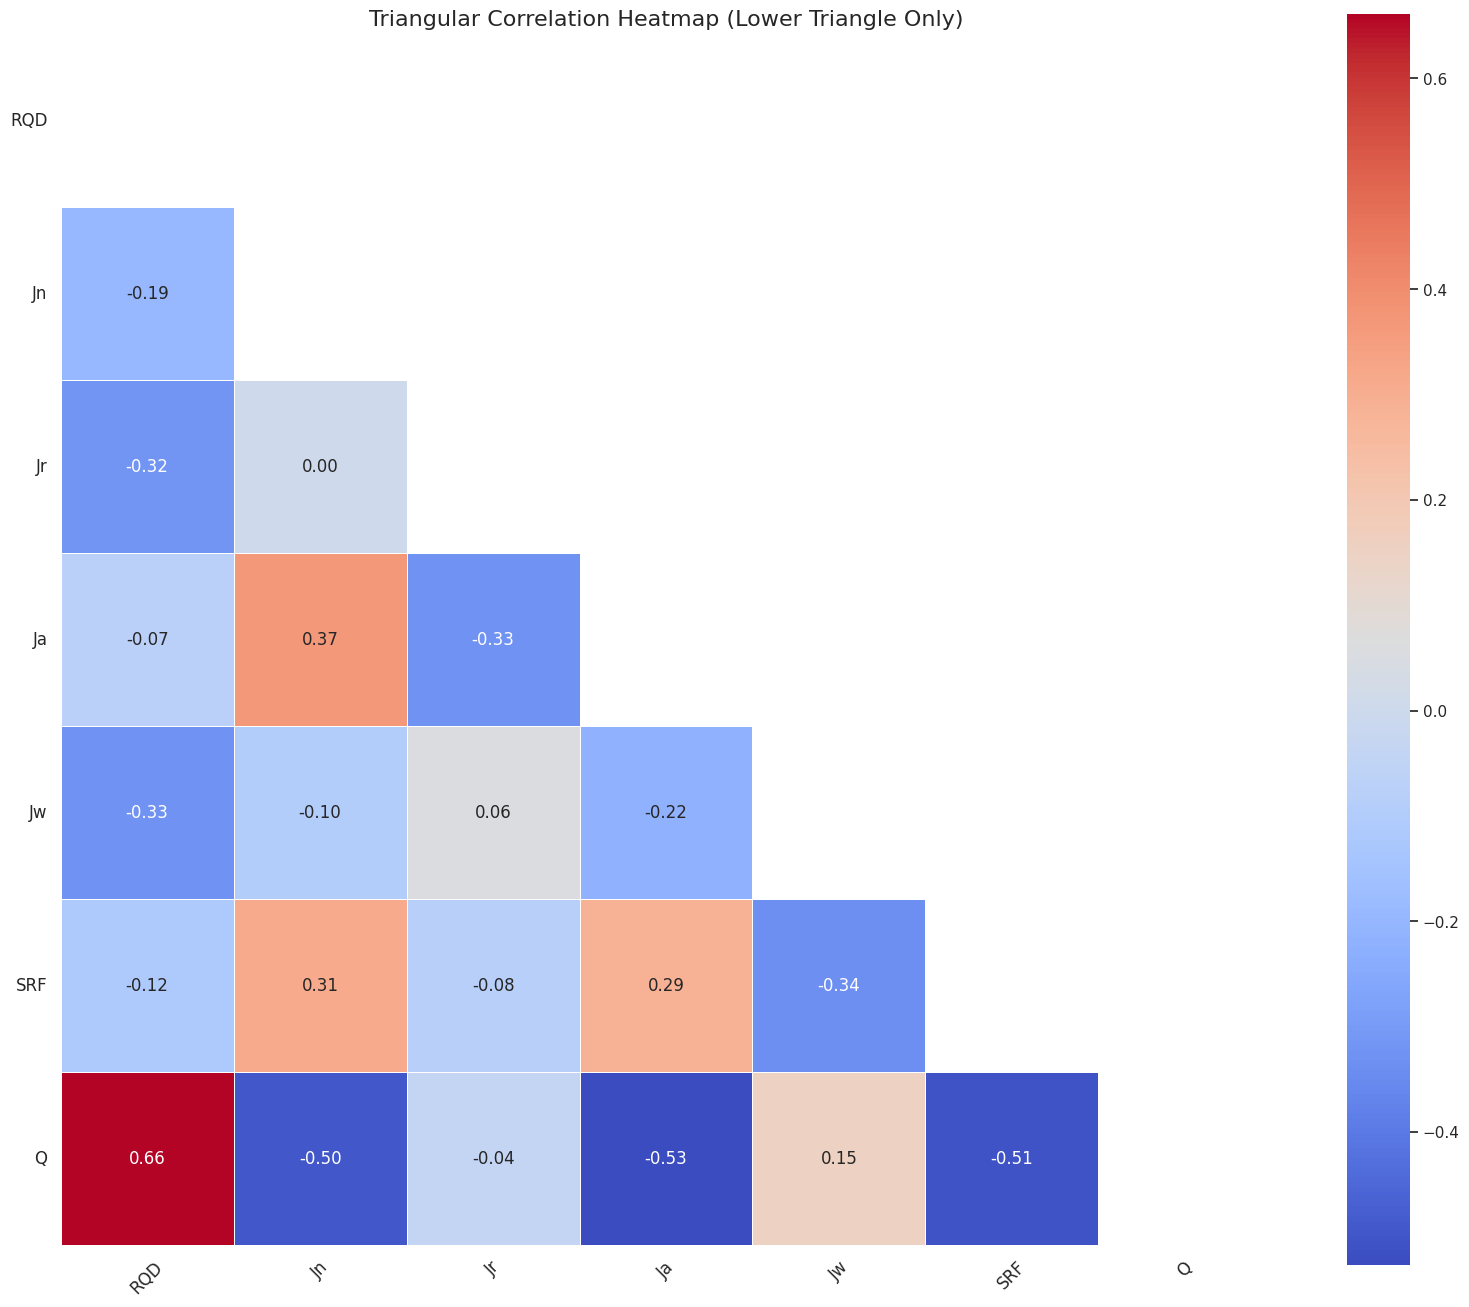

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(16, 16))
corr = df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot heatmap with increased font sizes
sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    annot_kws={"size": 12}  # Increase annotation font size
)

# Increase x and y axis tick label font size
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12, rotation=0)

plt.title("Triangular Correlation Heatmap (Lower Triangle Only)", fontsize=16)
plt.tight_layout()
plt.show()

# Ensemble model traning and Evaluation

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dataset (replace 'data' with your actual DataFrame)
X = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]
#X = well_1_smoothed[['RT', 'VSH', 'PHI_eff','GR', 'RHOB']]
y = data['Q']

# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

# Splitting data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Results
print("Training Set Performance:")
print(f"R²: {r2_train:.4f}, MSE: {mse_train:.4f}")
print("\nTest Set Performance:")
print(f"R²: {r2_test:.4f}, MSE: {mse_test:.4f}")

Training Set Performance:
R²: 0.7910, MSE: 0.0916

Test Set Performance:
R²: 0.8276, MSE: 0.1499


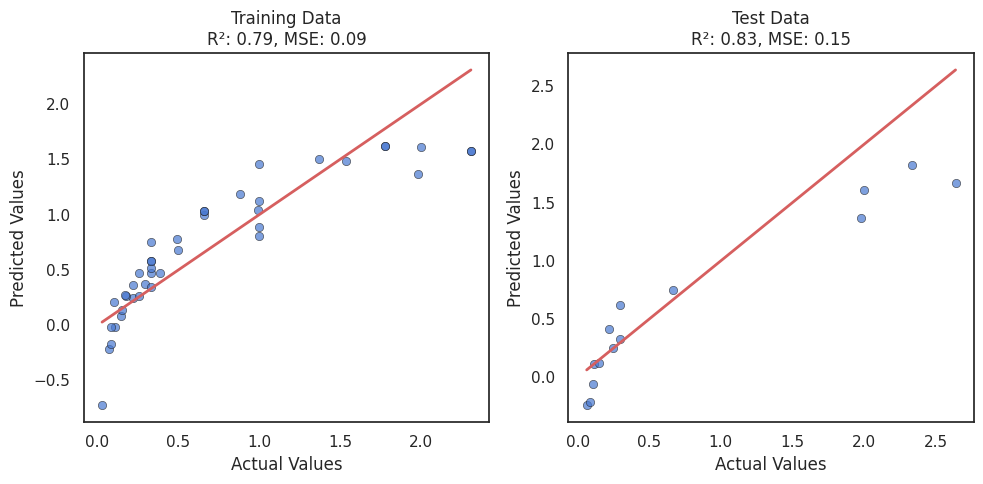

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))

# Train Data
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7, edgecolor='k')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Training Data\nR²: {r2_train:.2f}, MSE: {mse_train:.2f}")

# Test Data
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Test Data\nR²: {r2_test:.2f}, MSE: {mse_test:.2f}")

plt.tight_layout()
plt.show()

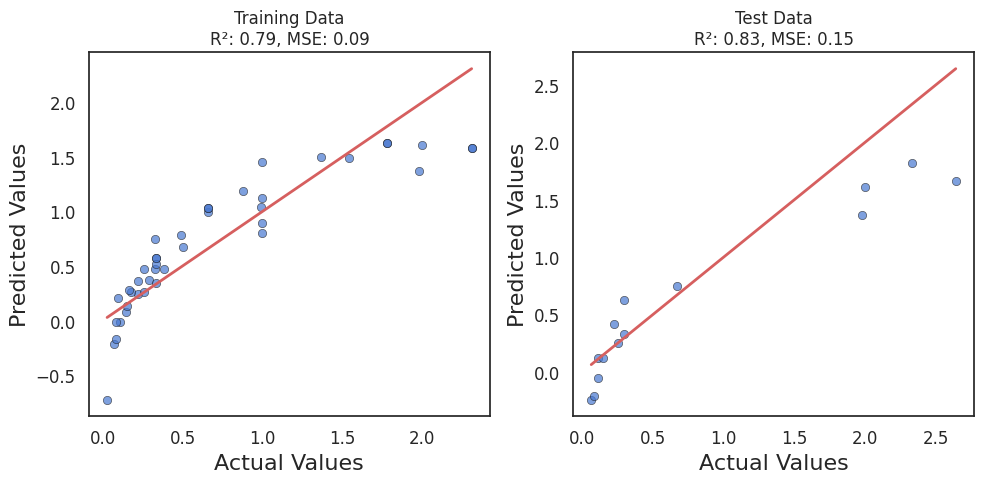

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Train Data
sns.scatterplot(x=y_train, y=y_pred_train, alpha=0.7, edgecolor='k', ax=axes[0])
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r', lw=2)
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_title(f"Training Data\nR²: {r2_train:.2f}, MSE: {mse_train:.2f}")
axes[0].tick_params(axis='both', which='major', labelsize=12)
axes[0].xaxis.label.set_size(16)
axes[0].yaxis.label.set_size(16)

# Test Data
sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.7, edgecolor='k', ax=axes[1])
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r', lw=2)
axes[1].set_xlabel("Actual Values")
axes[1].set_ylabel("Predicted Values")
axes[1].set_title(f"Test Data\nR²: {r2_test:.2f}, MSE: {mse_test:.2f}")
axes[1].tick_params(axis='both', which='major', labelsize=12)
axes[1].xaxis.label.set_size(16)
axes[1].yaxis.label.set_size(16)

plt.tight_layout()
plt.show()


In [83]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

# Perform 4-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=4, scoring='r2')

# Output the results
print("Cross-Validation R² Scores: ", cv_scores)
print("Mean R² Score: ", np.mean(cv_scores))
print("Standard Deviation of R² Scores: ", np.std(cv_scores))

Cross-Validation R² Scores:  [-0.96441539  0.77546839  0.69706762  0.66856216]
Mean R² Score:  0.2941706979393305
Standard Deviation of R² Scores:  0.7276986526393495


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dataset split
# Dataset (replace 'data' with your actual DataFrame)
X = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]
#X = well_1_smoothed[['RT', 'VSH', 'PHI_eff','GR', 'RHOB']]
y = data['Q']
# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)


# Splitting data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=42)

# Define models
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror'),
    'Extra Trees': ExtraTreesRegressor(random_state=42)  # Disable verbose for CatBoost
}

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Train and evaluate models
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Model Evaluation
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)

    # Print Results
    print(f"\n{name} - Training Set Performance:")
    print(f"R²: {r2_train:.4f}, MSE: {mse_train:.4f}, MAE: {mae_train:.4f}, RMSE: {rmse_train:.4f}")
    print(f"\n{name} - Test Set Performance:")
    print(f"R²: {r2_test:.4f}, MSE: {mse_test:.4f}, MAE: {mae_test:.4f}, RMSE: {rmse_test:.4f}")
    print("-" * 50)

Training Random Forest...

Random Forest - Training Set Performance:
R²: 0.9793, MSE: 0.0091, MAE: 0.0685, RMSE: 0.0953

Random Forest - Test Set Performance:
R²: 0.8575, MSE: 0.1238, MAE: 0.2173, RMSE: 0.3519
--------------------------------------------------
Training Gradient Boosting...

Gradient Boosting - Training Set Performance:
R²: 0.9961, MSE: 0.0017, MAE: 0.0253, RMSE: 0.0414

Gradient Boosting - Test Set Performance:
R²: 0.8181, MSE: 0.1581, MAE: 0.2257, RMSE: 0.3977
--------------------------------------------------
Training XGBoost...

XGBoost - Training Set Performance:
R²: 1.0000, MSE: 0.0000, MAE: 0.0010, RMSE: 0.0015

XGBoost - Test Set Performance:
R²: 0.8248, MSE: 0.1523, MAE: 0.1953, RMSE: 0.3902
--------------------------------------------------
Training Extra Trees...

Extra Trees - Training Set Performance:
R²: 1.0000, MSE: 0.0000, MAE: 0.0000, RMSE: 0.0000

Extra Trees - Test Set Performance:
R²: 0.8411, MSE: 0.1381, MAE: 0.2128, RMSE: 0.3716
-------------------

In [85]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import PowerTransformer
import numpy as np

# K-Fold Cross Validation (4 folds)
kf = KFold(n_splits=4, shuffle=True, random_state=42)

# Evaluate models using cross-validation
for name, model in models.items():
    print(f"\nEvaluating {name} using 4-Fold Cross Validation...\n")

    r2_scores = cross_val_score(model, X_transformed, y, cv=kf, scoring='r2')

    # Print R² score for each fold
    for i, score in enumerate(r2_scores):
        print(f"Fold {i+1}: R² = {score:.4f}")

    # Print mean and standard deviation of R² scores
    print(f"\n{name} - Mean R²: {np.mean(r2_scores):.4f}, Std Dev: {np.std(r2_scores):.4f}")
    print("-" * 50)


Evaluating Random Forest using 4-Fold Cross Validation...

Fold 1: R² = 0.8923
Fold 2: R² = 0.8389
Fold 3: R² = 0.7404
Fold 4: R² = 0.7659

Random Forest - Mean R²: 0.8093, Std Dev: 0.0600
--------------------------------------------------

Evaluating Gradient Boosting using 4-Fold Cross Validation...

Fold 1: R² = 0.8178
Fold 2: R² = 0.9237
Fold 3: R² = 0.8169
Fold 4: R² = 0.8278

Gradient Boosting - Mean R²: 0.8465, Std Dev: 0.0448
--------------------------------------------------

Evaluating XGBoost using 4-Fold Cross Validation...

Fold 1: R² = 0.8248
Fold 2: R² = 0.8193
Fold 3: R² = 0.8345
Fold 4: R² = 0.8327

XGBoost - Mean R²: 0.8278, Std Dev: 0.0061
--------------------------------------------------

Evaluating Extra Trees using 4-Fold Cross Validation...

Fold 1: R² = 0.8405
Fold 2: R² = 0.8770
Fold 3: R² = 0.8210
Fold 4: R² = 0.8194

Extra Trees - Mean R²: 0.8395, Std Dev: 0.0232
--------------------------------------------------


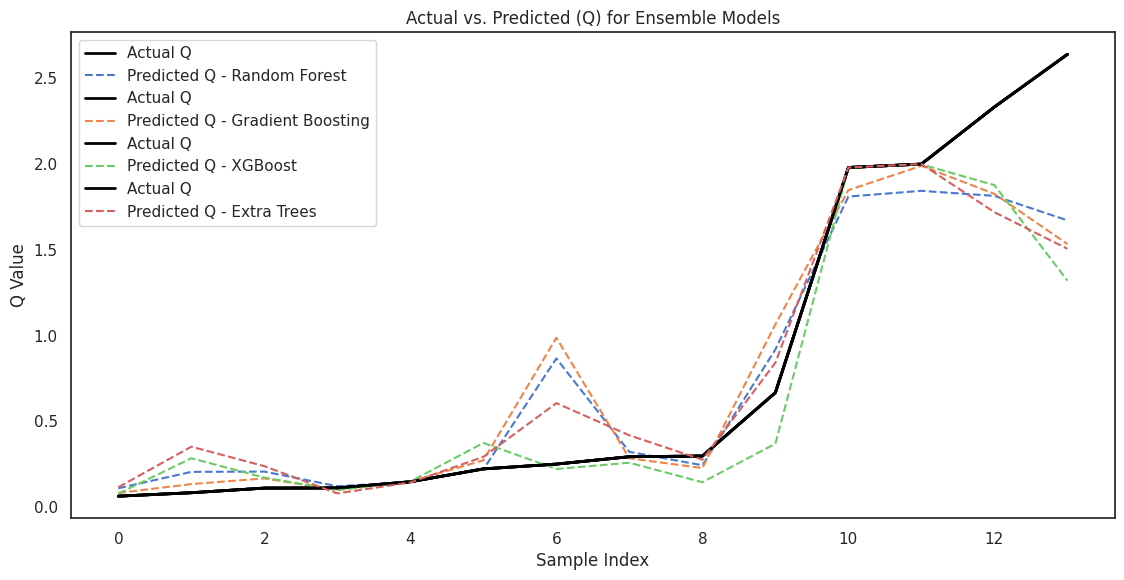

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Sort actual values for a better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

for name, model in models.items():
    y_pred_test = model.predict(X_test)
    y_pred_sorted = np.array(y_pred_test)[sorted_indices]  # Sort predictions accordingly
    plt.plot(y_test_sorted, label="Actual Q", color="black", linewidth=2)
    plt.plot(y_pred_sorted, label=f"Predicted Q - {name}", linestyle="--")

plt.xlabel("Sample Index")
plt.ylabel("Q Value")
plt.title("Actual vs. Predicted (Q) for Ensemble Models")
plt.legend()
plt.show()

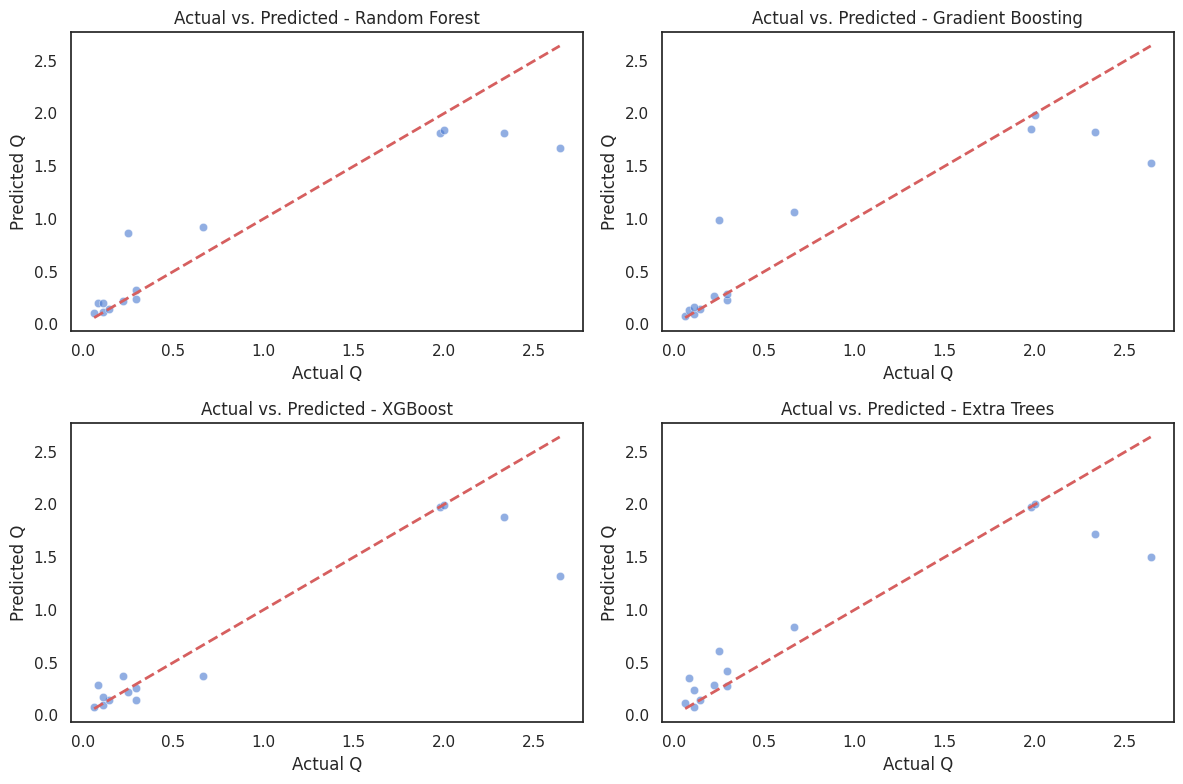

In [87]:
import seaborn as sns

plt.figure(figsize=(12, 8))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred_test = model.predict(X_test)

    plt.subplot(2, 2, i)
    sns.scatterplot(x=y_test, y=y_pred_test, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
    plt.xlabel("Actual Q")
    plt.ylabel("Predicted Q")
    plt.title(f"Actual vs. Predicted - {name}")

plt.tight_layout()
plt.show()

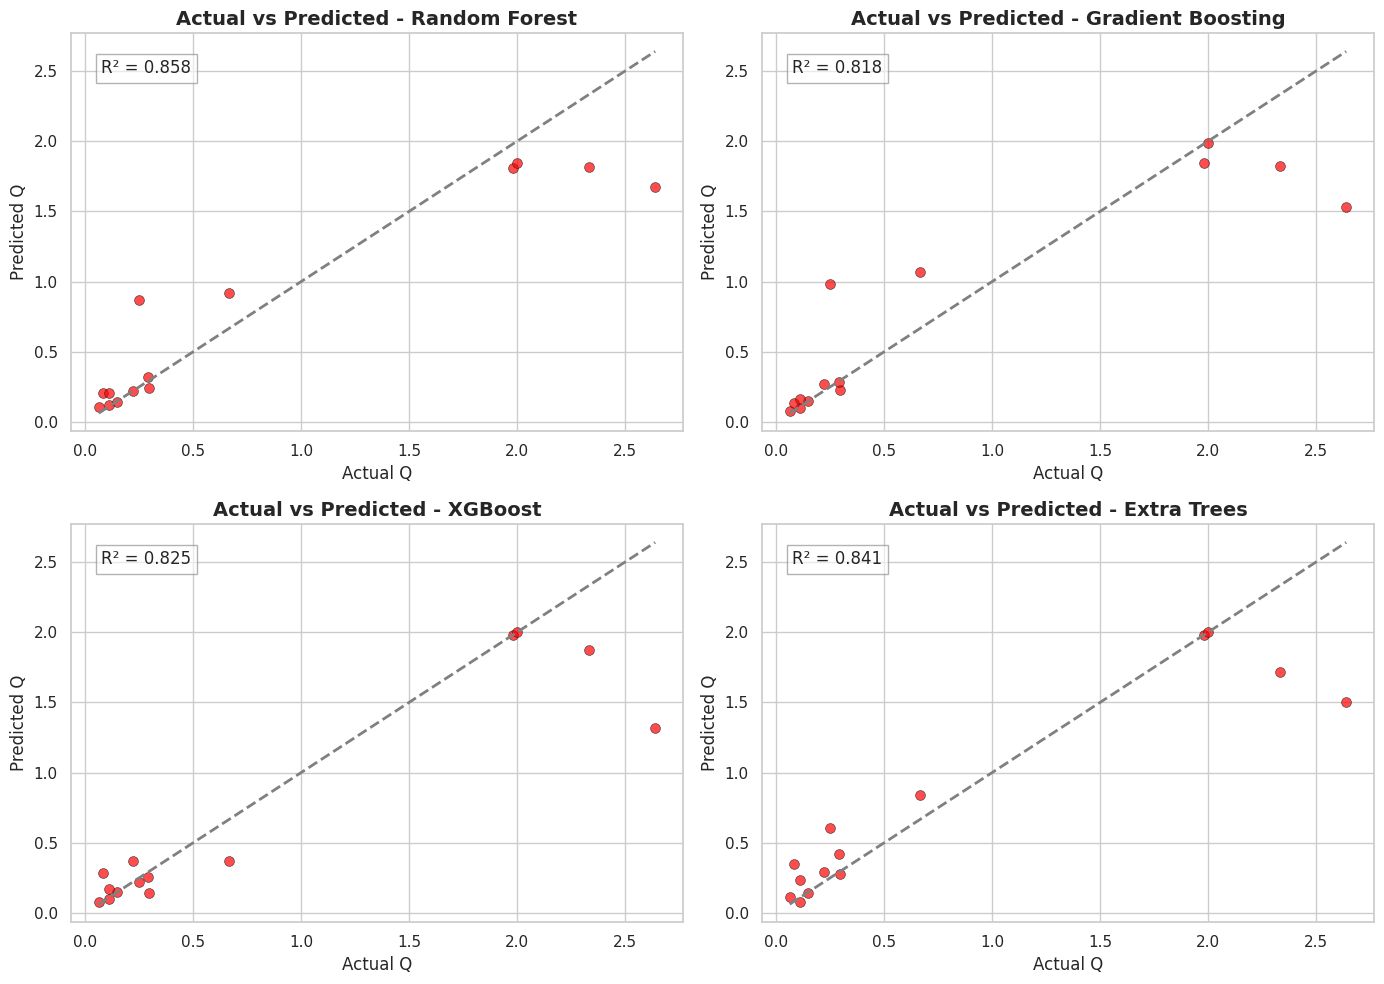

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

for i, (name, model) in enumerate(models.items(), 1):
    y_pred_test = model.predict(X_test)
    r2 = r2_score(y_test, y_pred_test)

    plt.subplot(2, 2, i)
    sns.scatterplot(
        x=y_test, y=y_pred_test,
        color='red', s=50, alpha=0.7,
        edgecolor="k", linewidth=0.5
    )

    # Identity line
    min_val = min(y_test.min(), y_pred_test.min())
    max_val = max(y_test.max(), y_pred_test.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'gray', linestyle="--", lw=2)

    # Labels & title
    plt.xlabel("Actual Q", fontsize=12)
    plt.ylabel("Predicted Q", fontsize=12)
    plt.title(f"Actual vs Predicted - {name}", fontsize=14, fontweight="bold")

    # R² annotation
    plt.text(0.05, 0.9, f"R² = {r2:.3f}", transform=plt.gca().transAxes,
             fontsize=12, bbox=dict(facecolor="white", alpha=0.6, edgecolor="gray"))

plt.tight_layout()
plt.show()

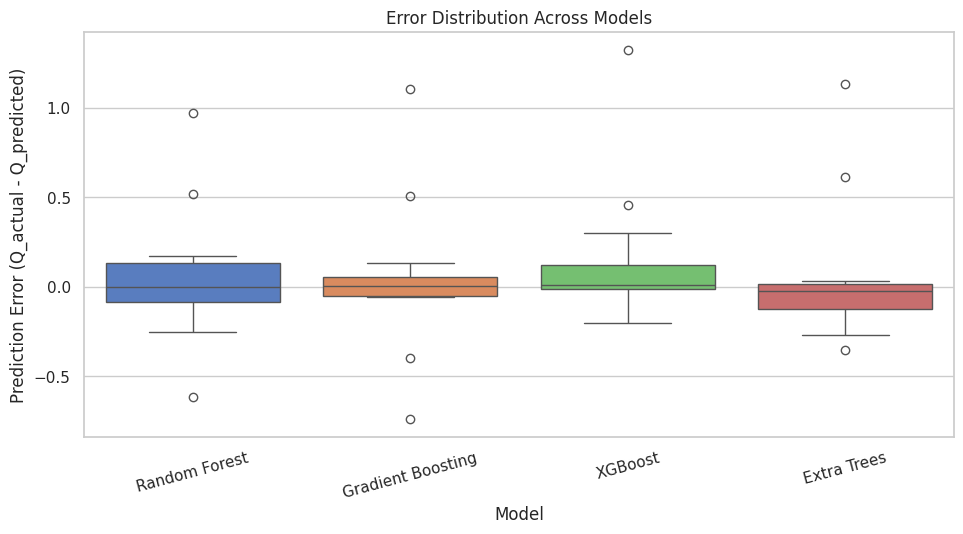

In [89]:
errors = {name: y_test - model.predict(X_test) for name, model in models.items()}

plt.figure(figsize=(10, 5))
sns.boxplot(data=pd.DataFrame(errors))
plt.xlabel("Model")
plt.ylabel("Prediction Error (Q_actual - Q_predicted)")
plt.title("Error Distribution Across Models")
plt.xticks(rotation=15)
plt.show()

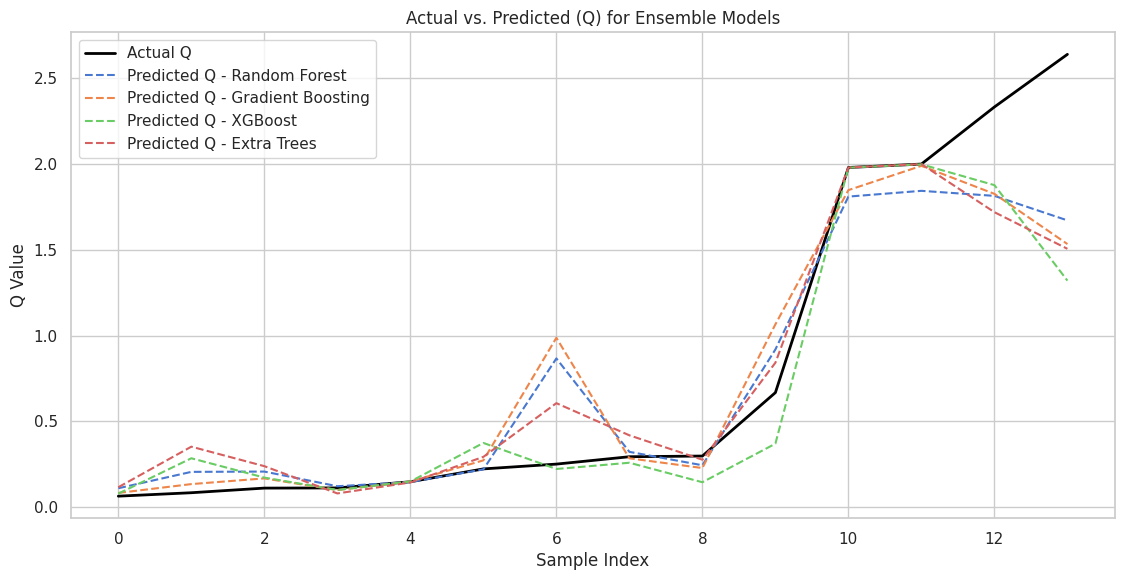

In [90]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))

# Sort actual values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

plt.plot(y_test_sorted, label="Actual Q", color="black", linewidth=2)  # Actual values

# Plot predicted values for each model
for name, model in models.items():
    y_pred_test = model.predict(X_test)
    y_pred_sorted = np.array(y_pred_test)[sorted_indices]  # Sort predictions accordingly
    plt.plot(y_pred_sorted, linestyle="--", label=f"Predicted Q - {name}")

plt.xlabel("Sample Index")
plt.ylabel("Q Value")
plt.title("Actual vs. Predicted (Q) for Ensemble Models")
plt.legend()
plt.show()

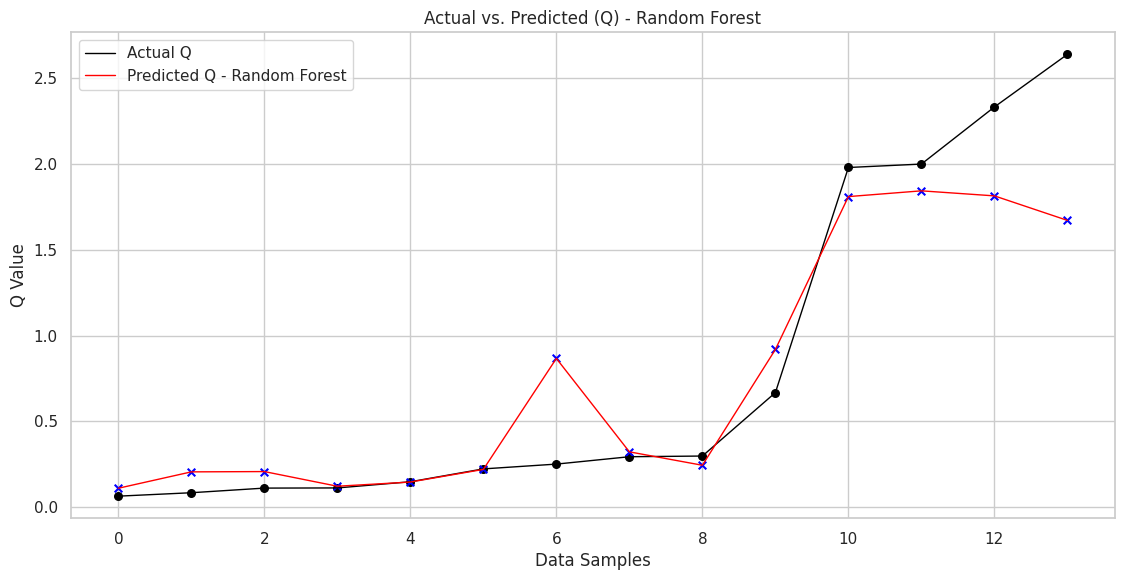

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Sort actual values for better visualization
sorted_indices = np.argsort(y_test)
y_test_sorted = np.array(y_test)[sorted_indices]

# Get predictions from Random Forest and sort them accordingly
rf_model = models['Random Forest']
y_pred_rf = rf_model.predict(X_test)
y_pred_sorted = np.array(y_pred_rf)[sorted_indices]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(y_test_sorted, label="Actual Q", color="black", linestyle="-", linewidth=1)  # Thin line for actual values
plt.scatter(range(len(y_test_sorted)), y_test_sorted, color="black", marker='o', s=30)  # Dots for actual values

plt.plot(y_pred_sorted, label="Predicted Q - Random Forest", color="red", linestyle="-", linewidth=1)  # Thin line for predictions
plt.scatter(range(len(y_pred_sorted)), y_pred_sorted, color="blue", marker='x', s=30)  # Dots for predicted values

plt.xlabel("Data Samples")
plt.ylabel("Q Value")
plt.title("Actual vs. Predicted (Q) - Random Forest")
plt.legend()
plt.show()

# Data generation as Blind dataset

In [92]:
from sklearn.mixture import GaussianMixture
import pandas as pd
import numpy as np

# Columns to consider
columns = ['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF', 'Q']
data = df[columns]

# Fit Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # Adjust components based on data complexity
gmm.fit(data)

# Generate synthetic samples (500 samples)
synthetic_data, _ = gmm.sample(500)

# Create a DataFrame
blind_data = pd.DataFrame(synthetic_data, columns=columns)

# Ensure no negative values (if your data shouldn't have any)
blind_data = blind_data.apply(lambda x: np.maximum(x, 0))

blind_data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,39.59,9.68,2.60,5.05,0.72,3.56,0.70
std,22.42,3.79,0.50,1.78,0.22,1.20,0.74
min,3.79,0.00,0.91,0.24,0.22,0.84,0.00
25%,12.89,6.92,2.31,3.77,0.56,2.70,0.19
50%,42.77,9.48,2.66,4.84,0.70,3.42,0.37
75%,60.94,12.06,2.94,6.30,0.85,4.33,1.10
max,80.11,22.98,4.24,10.09,1.46,7.61,3.99


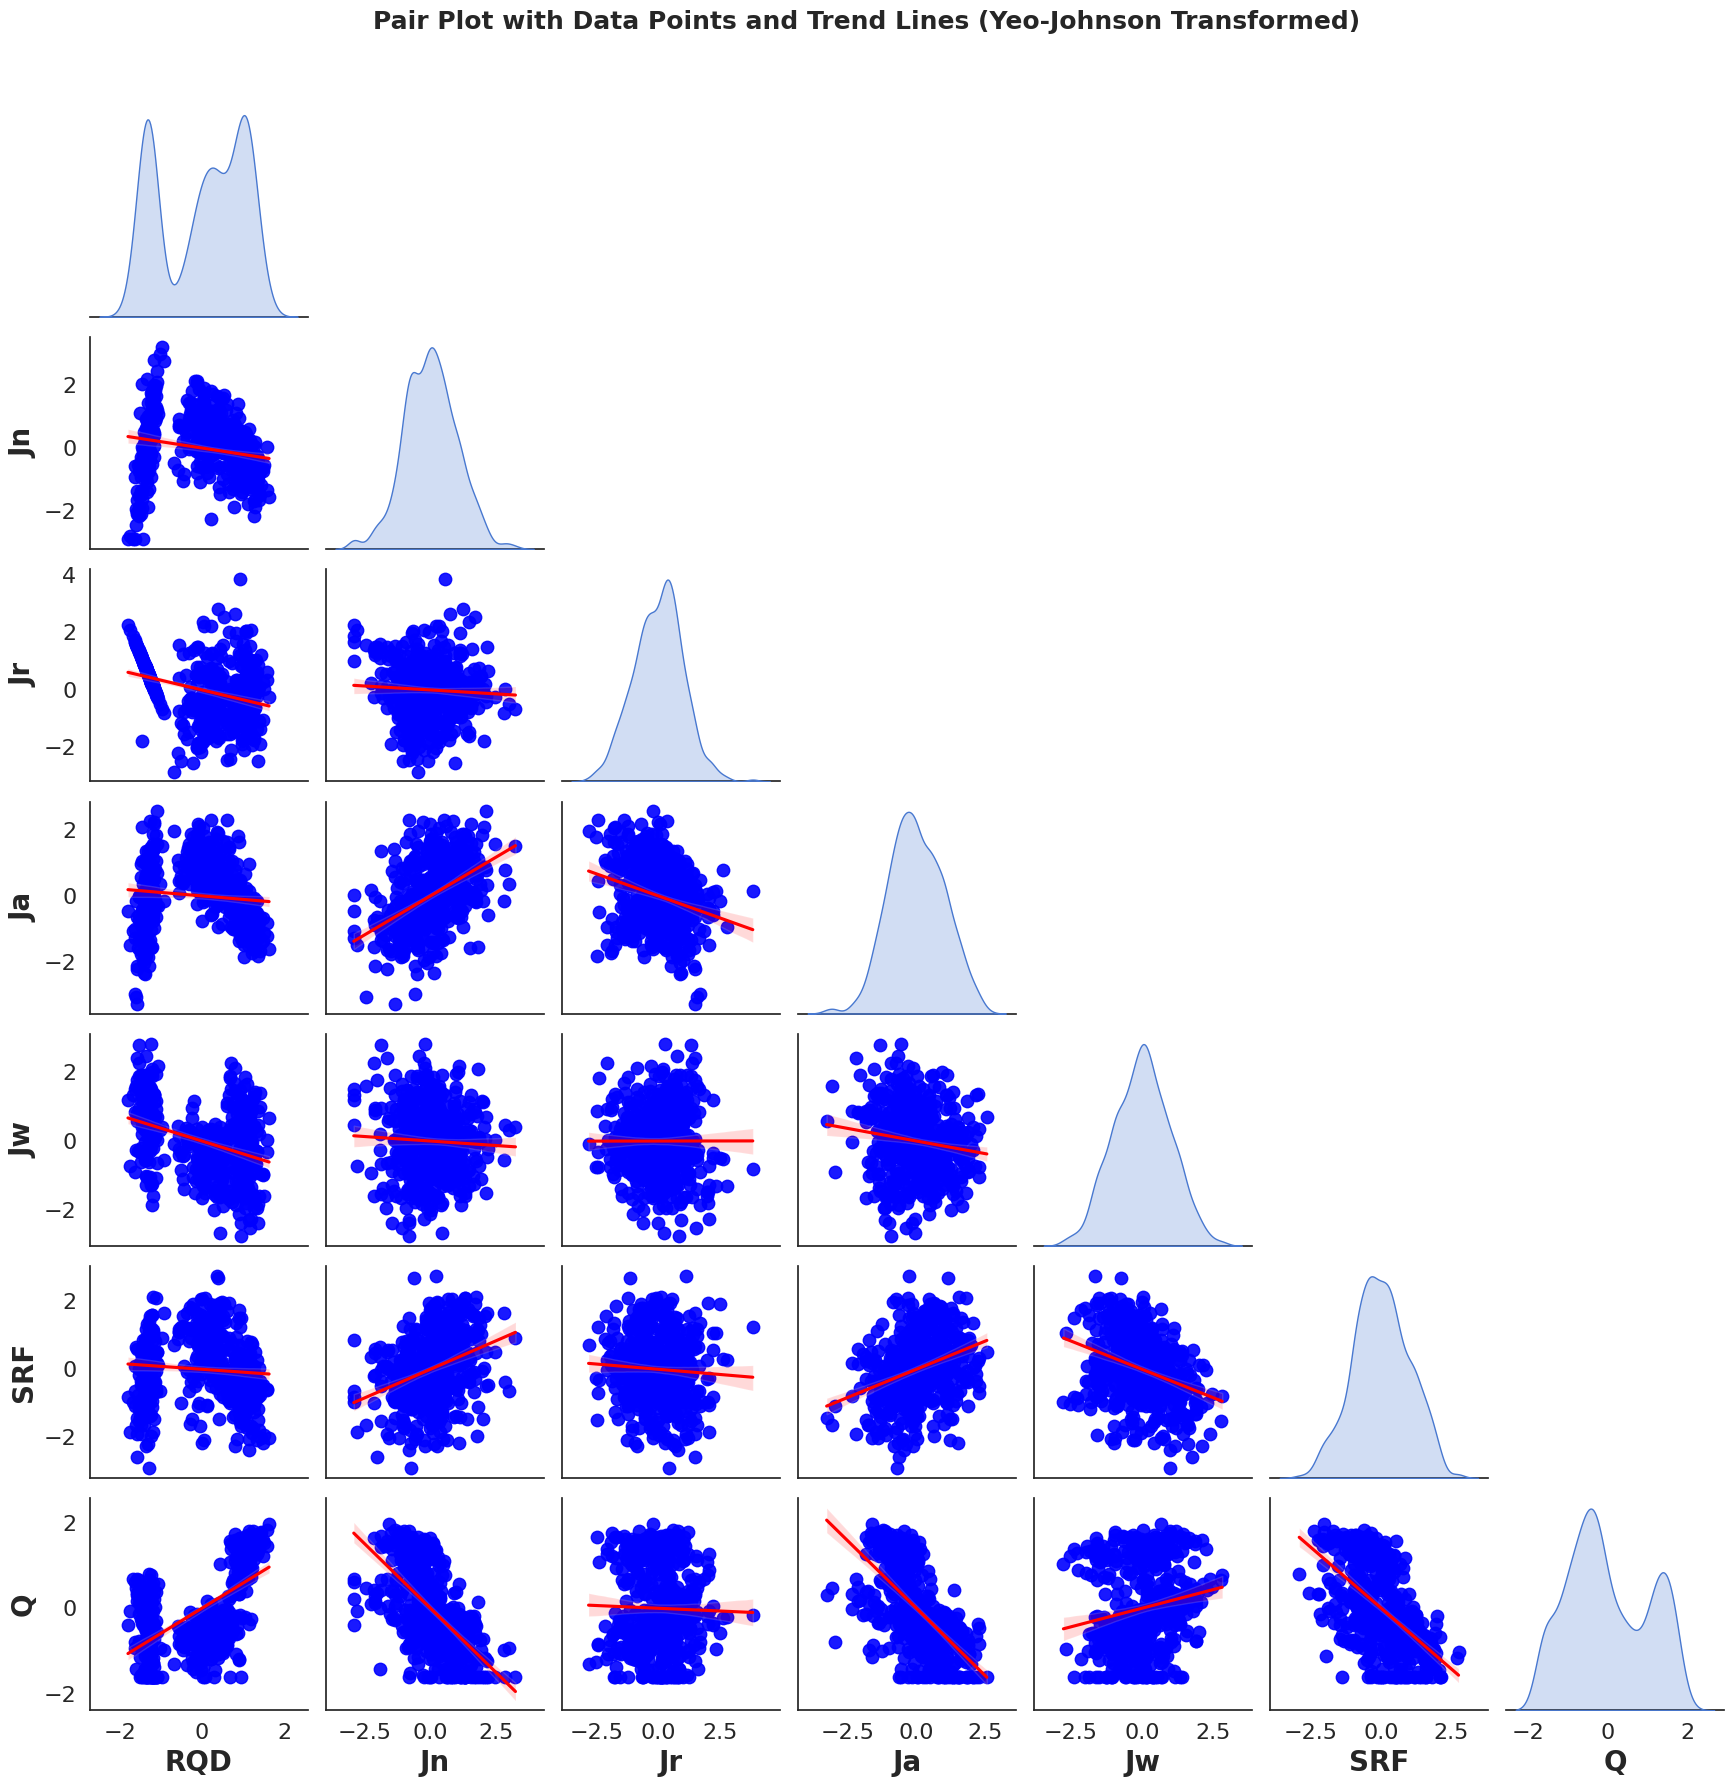

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt


# Selecting the required columns from well_1_smoothed
w = blind_data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF',	'Q']]

# Applying Yeo-Johnson transformation
transformer = PowerTransformer(method='yeo-johnson')
w_transformed = transformer.fit_transform(w)

# Creating a new DataFrame with transformed data
w_transformed_df = pd.DataFrame(w_transformed, columns=w.columns)

# Set the fivethirtyeight style with a muted palette
sns.set(style="white", palette="muted")

# Create a pair plot with scatter points and trend lines
pair_plot = sns.pairplot(
    w_transformed_df,
    kind='reg',  # Adds linear trend lines
    plot_kws={'scatter_kws': {'s': 80, 'alpha': 0.9, 'color': 'blue'}, 'line_kws': {'color': 'red'}},  # Scatter and trend line settings
    diag_kind='kde',  # Kernel density estimate for diagonal
    diag_kws={'shade': True, 'bw_adjust': 0.8},  # KDE settings
    height=2.5,
    corner=True  # Only lower triangle
)

# Add a title to the entire pair plot
pair_plot.fig.suptitle("Pair Plot with Data Points and Trend Lines (Yeo-Johnson Transformed)",
                       fontsize=18, fontweight='bold', y=1.02)

# Adjust the axis label and tick properties for all axes
for ax in pair_plot.axes.flat:
    if ax is not None:
        ax.xaxis.label.set_size(20)
        ax.yaxis.label.set_size(20)
        ax.xaxis.label.set_weight('bold')
        ax.yaxis.label.set_weight('bold')
        ax.tick_params(axis='both', which='major', labelsize=16)

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()

In [94]:
# Ensure well2 exists
# Assuming X_well2 is your input DataFrame for prediction
X_well2 = blind_data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]

# Initialize a dictionary to store predictions
predictions = {}

# Apply the same Yeo-Johnson transformation used for training
transformer = PowerTransformer(method='yeo-johnson') # Initialize the transformer
X_well2_transformed = transformer.fit_transform(X_well2) # Transform X_well2

# Loop through all trained models and predict
for name, model in models.items():
    print(f"Predicting with {name}...")

    # Predict on the transformed blind dataset
    y_pred_well2 = model.predict(X_well2_transformed)

    # Inverse transform if necessary (adjust based on your y transformation)
    y_pred_well2_inv = y_pred_well2  # Use inverse_transform() if needed

    # Clip negative predictions if necessary
    y_pred_well2_inv = np.maximum(y_pred_well2_inv, 0)

    # Store predictions in the DataFrame
    blind_data[f'Q_predicted_{name.replace(" ", "_")}'] = y_pred_well2_inv

# Display the first few rows with predictions
blind_data.describe()

Predicting with Random Forest...
Predicting with Gradient Boosting...
Predicting with XGBoost...
Predicting with Extra Trees...


,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,39.59,9.68,2.60,5.05,0.72,3.56,0.70,0.70,0.68,0.66,0.67
std,22.42,3.79,0.50,1.78,0.22,1.20,0.74,0.59,0.62,0.54,0.51
min,3.79,0.00,0.91,0.24,0.22,0.84,0.00,0.05,0.02,0.05,0.08
25%,12.89,6.92,2.31,3.77,0.56,2.70,0.19,0.22,0.20,0.23,0.26
50%,42.77,9.48,2.66,4.84,0.70,3.42,0.37,0.41,0.35,0.42,0.45
75%,60.94,12.06,2.94,6.30,0.85,4.33,1.10,1.17,1.07,0.99,1.04
max,80.11,22.98,4.24,10.09,1.46,7.61,3.99,2.24,2.31,2.17,2.18


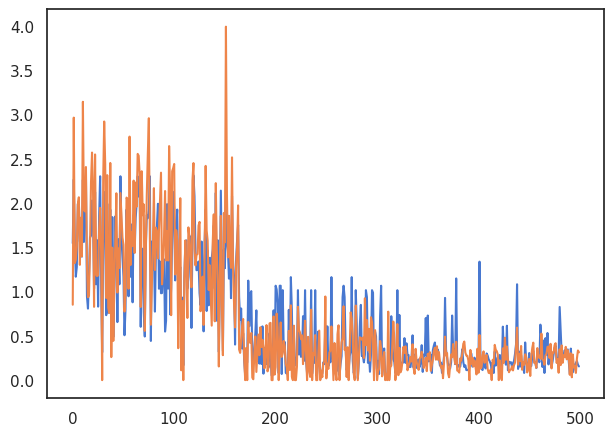

In [95]:
plt.plot(blind_data['Q_predicted_Gradient_Boosting'].values)
plt.plot(blind_data['Q'].values)

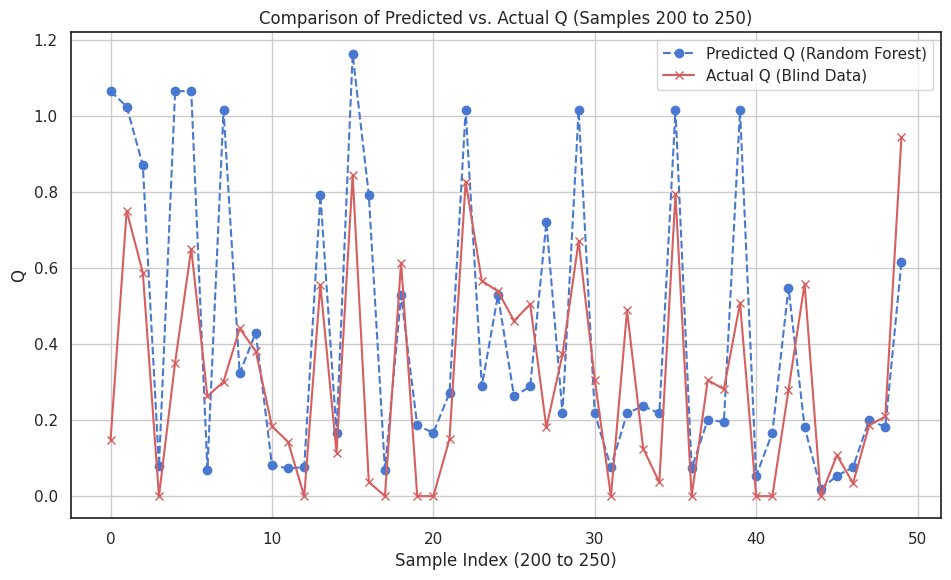

In [96]:
import matplotlib.pyplot as plt

# Plotting samples from index 200 to 250
plt.figure(figsize=(10, 6))
plt.plot(blind_data['Q_predicted_Gradient_Boosting'].values[200:250], label='Predicted Q (Random Forest)', color='b', linestyle='--', marker='o')
plt.plot(blind_data['Q'].values[200:250], label='Actual Q (Blind Data)', color='r', linestyle='-', marker='x')

plt.xlabel('Sample Index (200 to 250)')
plt.ylabel('Q')
plt.title('Comparison of Predicted vs. Actual Q (Samples 200 to 250)')
plt.legend()
plt.grid(True)
plt.show()

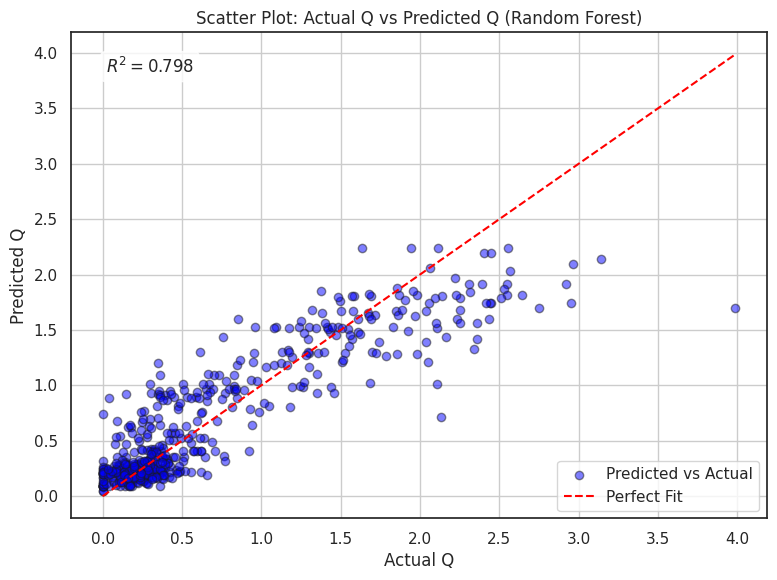

In [97]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R²
r2 = r2_score(blind_data['Q'], blind_data['Q_predicted_Random_Forest'])

# Scatter plot for Actual vs Predicted Q
plt.figure(figsize=(8, 6))
plt.scatter(
    blind_data['Q'],
    blind_data['Q_predicted_Random_Forest'],
    alpha=0.5,color='blue',
    edgecolors='k',
    label='Predicted vs Actual'
)

# Reference line (perfect fit)
plt.plot(
    [blind_data['Q'].min(), blind_data['Q'].max()],
    [blind_data['Q'].min(), blind_data['Q'].max()],
    linestyle='--',color='red',
    label='Perfect Fit'
)

# Labels and title
plt.xlabel('Actual Q')
plt.ylabel('Predicted Q')
plt.title('Scatter Plot: Actual Q vs Predicted Q (Random Forest)')

# Annotate R² on plot
plt.text(
    0.05, 0.95,
    f'$R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8)
)

plt.legend()
plt.grid(True)
plt.show()


In [98]:
import numpy as np

blind_data['Q_emp1'] = (
    (blind_data['RQD'] / blind_data['Jn'].replace(0, np.nan)) *
    (blind_data['Jr'] / blind_data['Ja'].replace(0, np.nan)) *
    (blind_data['Jw'] / blind_data['SRF'].replace(0, np.nan))
)


In [99]:
blind_data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees,Q_emp1
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00,496.00
mean,39.59,9.68,2.60,5.05,0.72,3.56,0.70,0.70,0.68,0.66,0.67,0.83
std,22.42,3.79,0.50,1.78,0.22,1.20,0.74,0.59,0.62,0.54,0.51,1.56
min,3.79,0.00,0.91,0.24,0.22,0.84,0.00,0.05,0.02,0.05,0.08,0.02
25%,12.89,6.92,2.31,3.77,0.56,2.70,0.19,0.22,0.20,0.23,0.26,0.15
50%,42.77,9.48,2.66,4.84,0.70,3.42,0.37,0.41,0.35,0.42,0.45,0.32
75%,60.94,12.06,2.94,6.30,0.85,4.33,1.10,1.17,1.07,0.99,1.04,1.00
max,80.11,22.98,4.24,10.09,1.46,7.61,3.99,2.24,2.31,2.17,2.18,24.14


In [100]:

blind_data = blind_data[(blind_data['Q_emp1'] >= 0) & (blind_data['Q_emp1'] <= 3)]


In [101]:
blind_data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees,Q_emp1
count,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00
mean,39.12,9.97,2.59,5.16,0.71,3.63,0.63,0.66,0.63,0.62,0.63,0.62
std,21.82,3.61,0.49,1.73,0.22,1.18,0.65,0.57,0.59,0.52,0.48,0.69
min,5.96,1.75,0.91,0.57,0.22,0.84,0.00,0.05,0.02,0.05,0.08,0.02
25%,12.95,7.29,2.30,3.87,0.55,2.79,0.18,0.22,0.19,0.23,0.25,0.15
50%,42.44,9.67,2.65,4.96,0.70,3.50,0.35,0.37,0.32,0.37,0.41,0.30
75%,60.30,12.20,2.93,6.39,0.84,4.37,0.95,1.03,1.03,0.97,0.96,0.87
max,78.30,22.98,4.24,10.09,1.46,7.61,2.51,2.24,2.31,2.00,2.06,3.00


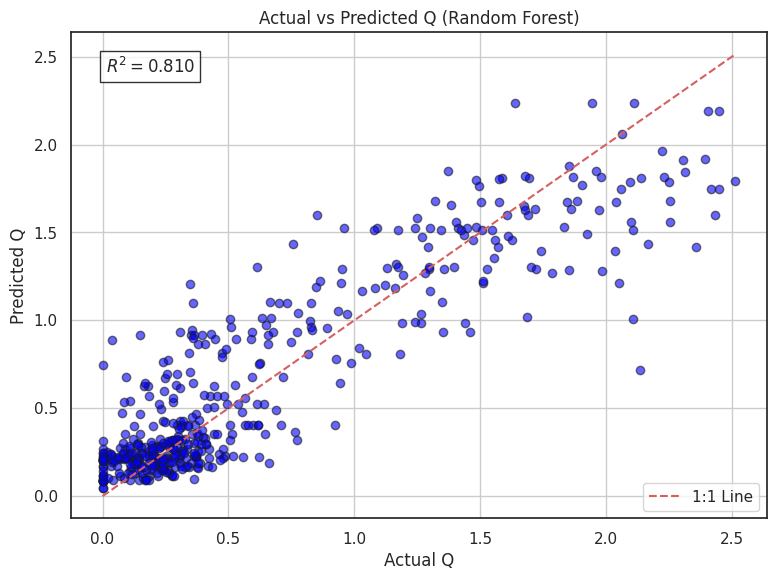

In [102]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np

# Calculate R²
r2 = r2_score(blind_data['Q'], blind_data['Q_predicted_Random_Forest'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    blind_data['Q'],
    blind_data['Q_predicted_Random_Forest'],
    alpha=0.6,color='blue',
    edgecolors='k'
)

# 1:1 reference line
min_val = min(blind_data['Q'].min(), blind_data['Q_predicted_Random_Forest'].min())
max_val = max(blind_data['Q'].max(), blind_data['Q_predicted_Random_Forest'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='1:1 Line')

# Labels and title
plt.xlabel('Actual Q')
plt.ylabel('Predicted Q')
plt.title('Actual vs Predicted Q (Random Forest)')

# ➤ Print R² on plot
plt.text(
    0.05, 0.95,
    f'$R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.legend()
plt.grid(True)
plt.show()


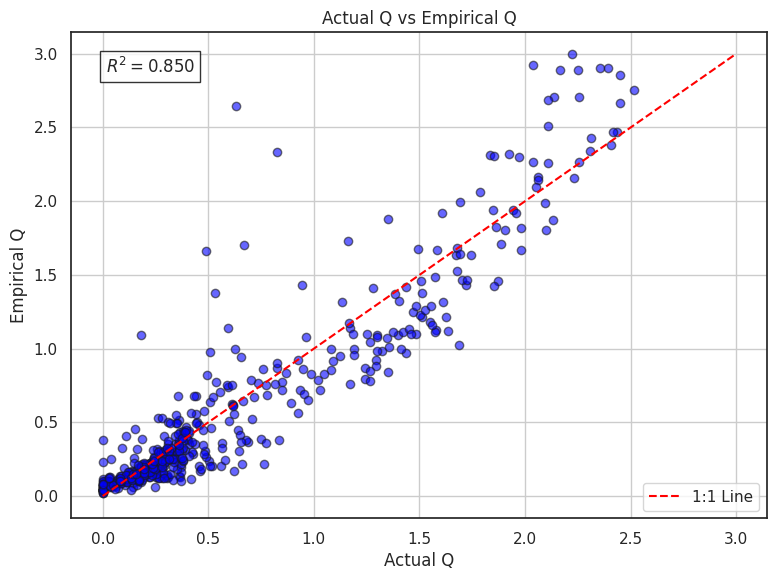

In [103]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Calculate R²
r2 = r2_score(blind_data['Q'], blind_data['Q_emp1'])

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(
    blind_data['Q'],
    blind_data['Q_emp1'],
    alpha=0.6,color='blue',
    edgecolors='k'
)

# 1:1 reference line
min_val = min(blind_data['Q'].min(), blind_data['Q_emp1'].min())
max_val = max(blind_data['Q'].max(), blind_data['Q_emp1'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--',color='red', label='1:1 Line')

# Labels & title
plt.xlabel('Actual Q')
plt.ylabel('Empirical Q')
plt.title('Actual Q vs Empirical Q')

# ➤ R² on plot
plt.text(
    0.05, 0.95,
    f'$R^2 = {r2:.3f}$',
    transform=plt.gca().transAxes,
    fontsize=12,
    verticalalignment='top',
    bbox=dict(facecolor='white', alpha=0.8, edgecolor='black')
)

plt.legend()
plt.grid(True)
plt.show()

Training Set Performance:
R²: 0.7910, MSE: 0.0916

Test Set Performance:
R²: 0.8276, MSE: 0.1499

Linear Regression Equation:
Q = 0.0060 + (0.0210 * RQD) + (-0.0287 * Jn) + (0.0902 * Jr) + (-0.1004 * Ja) + (0.9795 * Jw) + (-0.0978 * SRF)


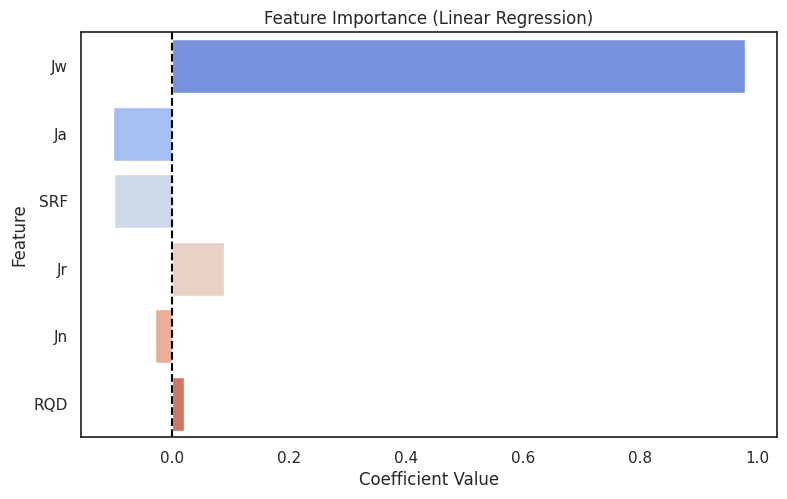

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Dataset (replace 'data' with your actual DataFrame)
X = data[['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']]

y = data['Q']

# Yeo-Johnson Transformation
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

# Splitting data into 75% training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Model Evaluation
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

# Results
print("Training Set Performance:")
print(f"R²: {r2_train:.4f}, MSE: {mse_train:.4f}")
print("\nTest Set Performance:")
print(f"R²: {r2_test:.4f}, MSE: {mse_test:.4f}")

# Getting the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Printing the equation
equation = f"Q = {intercept:.4f}"
for i, col in enumerate(X.columns):
    equation += f" + ({coefficients[i]:.4f} * {col})"
print("\nLinear Regression Equation:")
print(equation)

# Feature Importance Plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='coolwarm')
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance (Linear Regression)")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()

Nonlinear Regression Performance:
R²: 0.7475, MSE: 0.1388

Derived Nonlinear Equation:
Q = 0.9243 * RQD^3.1745 + -0.2614 * Jn^0.9534 + 0.2604 * Jr^0.0306 + -0.0316 * exp(Ja) + -0.1818 * Jw * SRF


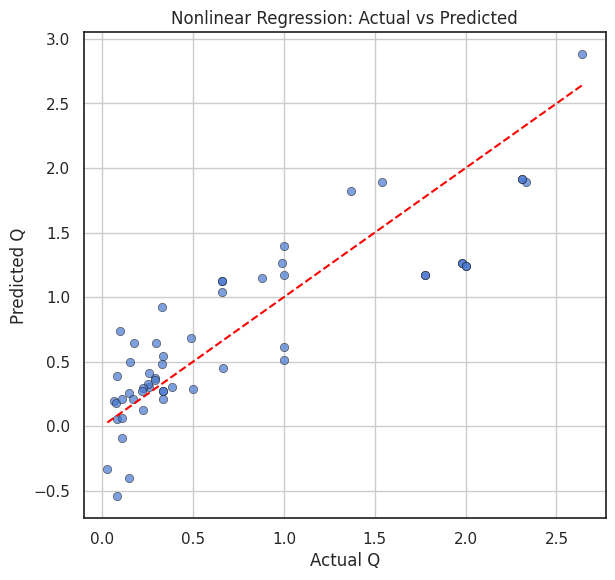

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error

# Load Data
X = data[['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF']]
y = data['Q']

# Normalize X and y
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Define the nonlinear model
def nonlinear_Q(X, a, b, c, d, e, f, g, h):
    RQD, Jn, Jr, Ja, Jw, SRF = X.T  # Ensure correct feature unpacking
    return a * RQD**b + c * Jn**d + e * Jr**f + g * np.exp(Ja) + h * Jw * SRF

# Initial guesses for parameters
initial_guesses = np.ones(8)

# Curve fitting
params, covariance = curve_fit(nonlinear_Q, X_scaled, y_scaled, p0=initial_guesses, maxfev=20000)

# Predictions
y_pred_scaled = nonlinear_Q(X_scaled, *params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Model Evaluation
r2_score_value = r2_score(y, y_pred)
mse_value = mean_squared_error(y, y_pred)

print(f"Nonlinear Regression Performance:\nR²: {r2_score_value:.4f}, MSE: {mse_value:.4f}")

# Derived Equation
equation = f"Q = {params[0]:.4f} * RQD^{params[1]:.4f} + {params[2]:.4f} * Jn^{params[3]:.4f} + " \
           f"{params[4]:.4f} * Jr^{params[5]:.4f} + {params[6]:.4f} * exp(Ja) + {params[7]:.4f} * Jw * SRF"
print("\nDerived Nonlinear Equation:")
print(equation)

# Scatter plot for actual vs predicted values
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--")
plt.xlabel("Actual Q")
plt.ylabel("Predicted Q")
plt.title("Nonlinear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

Top 3 Features Selected: ['RQD', 'Jn', 'SRF']

Nonlinear Regression Performance:
R²: 0.7989, MSE: 0.1105

Derived Nonlinear Equation:
Q = 0.8804 * RQD^3.1940 + -0.5106 * Jn^0.4739 + -0.1619 * exp(SRF) + 0.6068


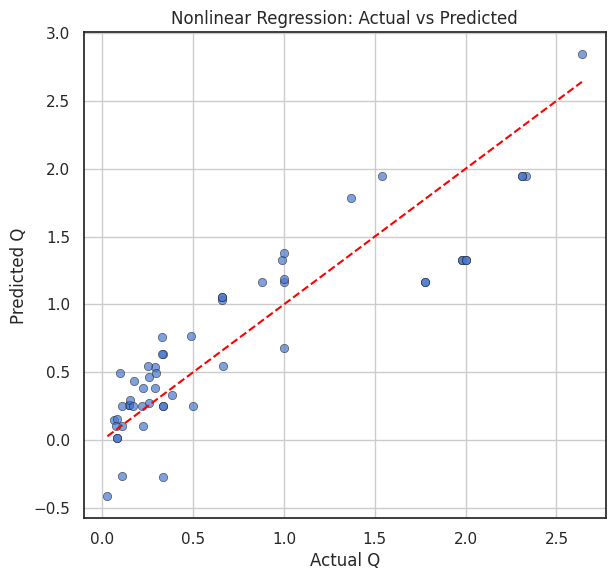

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load Data
X = data[['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF']]
y = data['Q']

# Step 1: Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(3).index.tolist()
print("Top 3 Features Selected:", top_features)

# Select the top 3 features
X_selected = data[top_features]

# Step 2: Normalize X and y
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_selected)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 3: Define the Nonlinear Model
def nonlinear_Q(X, a, b, c, d, e, f):
    F1, F2, F3 = X.T  # Ensure correct feature unpacking
    return a * F1**b + c * F2**d + e * np.exp(F3) + f

# Step 4: Curve Fitting
initial_guesses = np.ones(6)  # Initial parameter guesses
params, covariance = curve_fit(nonlinear_Q, X_scaled, y_scaled, p0=initial_guesses, maxfev=20000)

# Step 5: Predictions
y_pred_scaled = nonlinear_Q(X_scaled, *params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 6: Model Evaluation
r2_score_value = r2_score(y, y_pred)
mse_value = mean_squared_error(y, y_pred)

print(f"\nNonlinear Regression Performance:\nR²: {r2_score_value:.4f}, MSE: {mse_value:.4f}")

# Step 7: Derived Nonlinear Equation
equation = f"Q = {params[0]:.4f} * {top_features[0]}^{params[1]:.4f} + {params[2]:.4f} * {top_features[1]}^{params[3]:.4f} + " \
           f"{params[4]:.4f} * exp({top_features[2]}) + {params[5]:.4f}"
print("\nDerived Nonlinear Equation:")
print(equation)

# Step 8: Scatter Plot - Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--")
plt.xlabel("Actual Q")
plt.ylabel("Predicted Q")
plt.title("Nonlinear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

Top 3 Features Selected: ['RQD', 'Jn', 'SRF']


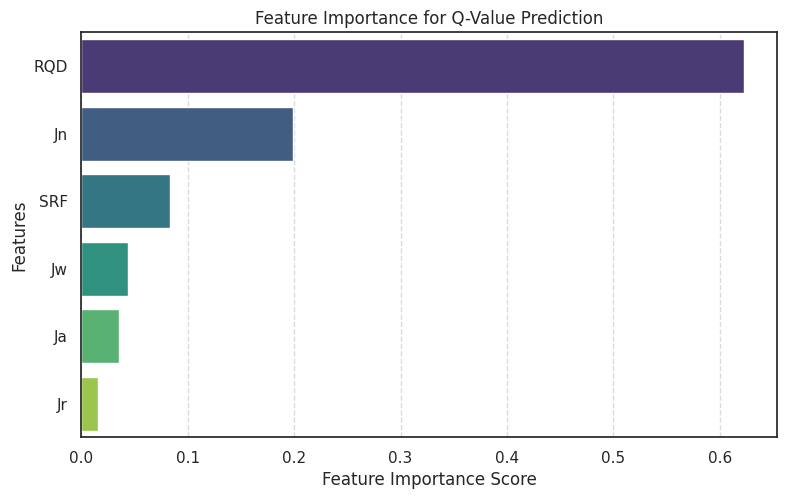


Nonlinear Regression Performance:
R²: 0.7989, MSE: 0.1105

Derived Nonlinear Equation:
Q = 0.8804 * RQD^3.1940 + -0.5106 * Jn^0.4739 + -0.1619 * exp(SRF) + 0.6068


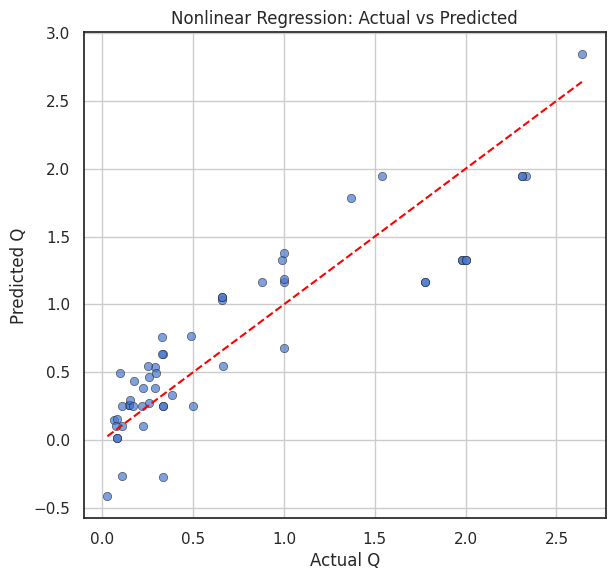

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor

# Load Data
X = data[['RQD', 'Jn', 'Jr', 'Ja', 'Jw', 'SRF']]
y = data['Q']

# Step 1: Feature Importance using Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
top_features = feature_importances.nlargest(3).index.tolist()
print("Top 3 Features Selected:", top_features)

# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances.sort_values(ascending=False),
            y=feature_importances.sort_values(ascending=False).index,
            palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance for Q-Value Prediction")
plt.grid(axis='x', linestyle="--", alpha=0.7)
plt.show()

# Step 2: Select the top 3 features
X_selected = data[top_features]

# Step 3: Normalize X and y
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X_selected)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# Step 4: Define the Nonlinear Model
def nonlinear_Q(X, a, b, c, d, e, f):
    F1, F2, F3 = X.T  # Ensure correct feature unpacking
    return a * F1**b + c * F2**d + e * np.exp(F3) + f

# Step 5: Curve Fitting
initial_guesses = np.ones(6)  # Initial parameter guesses
params, covariance = curve_fit(nonlinear_Q, X_scaled, y_scaled, p0=initial_guesses, maxfev=20000)

# Step 6: Predictions
y_pred_scaled = nonlinear_Q(X_scaled, *params)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()

# Step 7: Model Evaluation
r2_score_value = r2_score(y, y_pred)
mse_value = mean_squared_error(y, y_pred)

print(f"\nNonlinear Regression Performance:\nR²: {r2_score_value:.4f}, MSE: {mse_value:.4f}")

# Step 8: Derived Nonlinear Equation
equation = f"Q = {params[0]:.4f} * {top_features[0]}^{params[1]:.4f} + {params[2]:.4f} * {top_features[1]}^{params[3]:.4f} + " \
           f"{params[4]:.4f} * exp({top_features[2]}) + {params[5]:.4f}"
print("\nDerived Nonlinear Equation:")
print(equation)

# Step 9: Scatter Plot - Actual vs Predicted
plt.figure(figsize=(6,6))
sns.scatterplot(x=y, y=y_pred, alpha=0.7, edgecolor="k")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle="--")
plt.xlabel("Actual Q")
plt.ylabel("Predicted Q")
plt.title("Nonlinear Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

In [108]:
blind_data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees,Q_emp1
count,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00
mean,39.12,9.97,2.59,5.16,0.71,3.63,0.63,0.66,0.63,0.62,0.63,0.62
std,21.82,3.61,0.49,1.73,0.22,1.18,0.65,0.57,0.59,0.52,0.48,0.69
min,5.96,1.75,0.91,0.57,0.22,0.84,0.00,0.05,0.02,0.05,0.08,0.02
25%,12.95,7.29,2.30,3.87,0.55,2.79,0.18,0.22,0.19,0.23,0.25,0.15
50%,42.44,9.67,2.65,4.96,0.70,3.50,0.35,0.37,0.32,0.37,0.41,0.30
75%,60.30,12.20,2.93,6.39,0.84,4.37,0.95,1.03,1.03,0.97,0.96,0.87
max,78.30,22.98,4.24,10.09,1.46,7.61,2.51,2.24,2.31,2.00,2.06,3.00


In [109]:
data = blind_data.copy()

# blind_data.describe()

In [110]:
data.describe()

,RQD,Jn,Jr,Ja,Jw,SRF,Q,Q_predicted_Random_Forest,Q_predicted_Gradient_Boosting,Q_predicted_XGBoost,Q_predicted_Extra_Trees,Q_emp1
count,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00,476.00
mean,39.12,9.97,2.59,5.16,0.71,3.63,0.63,0.66,0.63,0.62,0.63,0.62
std,21.82,3.61,0.49,1.73,0.22,1.18,0.65,0.57,0.59,0.52,0.48,0.69
min,5.96,1.75,0.91,0.57,0.22,0.84,0.00,0.05,0.02,0.05,0.08,0.02
25%,12.95,7.29,2.30,3.87,0.55,2.79,0.18,0.22,0.19,0.23,0.25,0.15
50%,42.44,9.67,2.65,4.96,0.70,3.50,0.35,0.37,0.32,0.37,0.41,0.30
75%,60.30,12.20,2.93,6.39,0.84,4.37,0.95,1.03,1.03,0.97,0.96,0.87
max,78.30,22.98,4.24,10.09,1.46,7.61,2.51,2.24,2.31,2.00,2.06,3.00


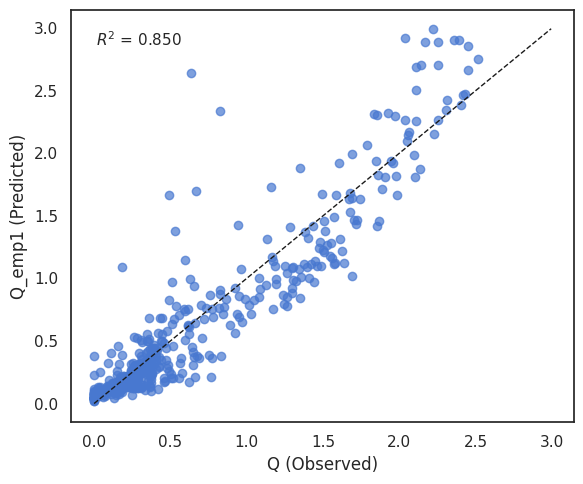

In [111]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Calculate R²
r2 = r2_score(data['Q'], data['Q_emp1'])

# Scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(data['Q'], data['Q_emp1'], alpha=0.7)

# 1:1 reference line (optional but useful)
min_val = min(data['Q'].min(), data['Q_emp1'].min())
max_val = max(data['Q'].max(), data['Q_emp1'].max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1)

# Labels
plt.xlabel('Q (Observed)')
plt.ylabel('Q_emp1 (Predicted)')

# Show R² on plot
plt.text(
    0.05, 0.95,
    f"$R^2$ = {r2:.3f}",
    transform=plt.gca().transAxes,
    fontsize=11,
    verticalalignment='top'
)

plt.tight_layout()
plt.show()

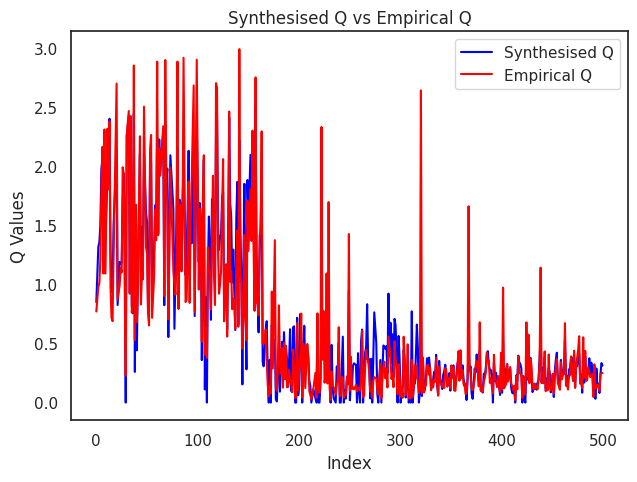

In [112]:
import matplotlib.pyplot as plt

# Plotting the actual vs predicted data
plt.plot(data['Q'], color='blue', label='Synthesised Q')  # Synthesized Q (Actual)
plt.plot(data['Q_emp1'], color='red', label='Empirical Q')  # Empirical Q (Predicted)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Q Values')
plt.title('Synthesised Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

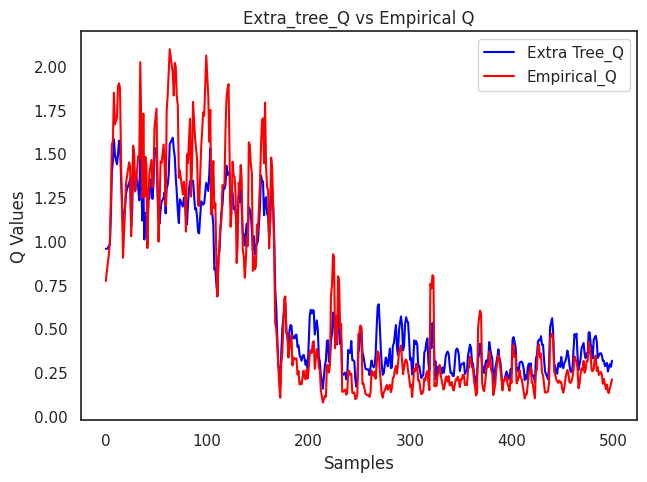

In [113]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_Extra_Trees'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp1'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='Extra Tree_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and' title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('Extra_tree_Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

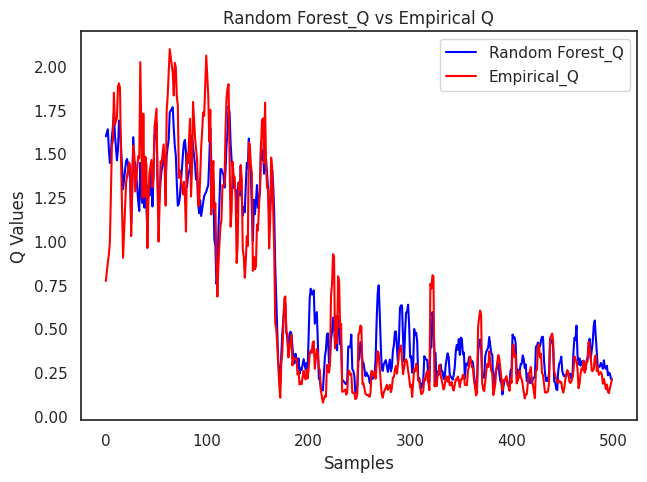

In [114]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_Random_Forest'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp1'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='Random Forest_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('Random Forest_Q vs Empirical Q')

# Adding a legend
plt.legend()
#plt.text(0.01, 0.95, f"R² = {r2:.3f}", transform=plt.gca().transAxes)

# Display the plot
plt.show()

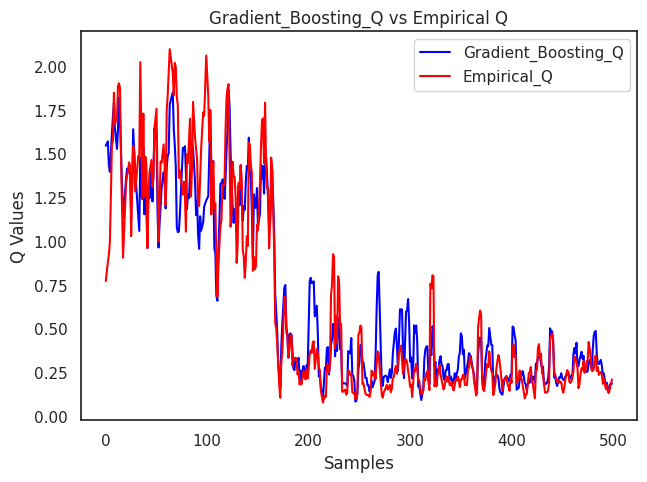

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_Gradient_Boosting'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp1'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='Gradient_Boosting_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('Gradient_Boosting_Q vs Empirical Q')
# R² annotation
#plt.text(0.05, 0.9, f"R² = {r2:.3f}", transform=plt.gca().transAxes)

# Adding a legend
plt.legend()

# Display the plot
plt.show()

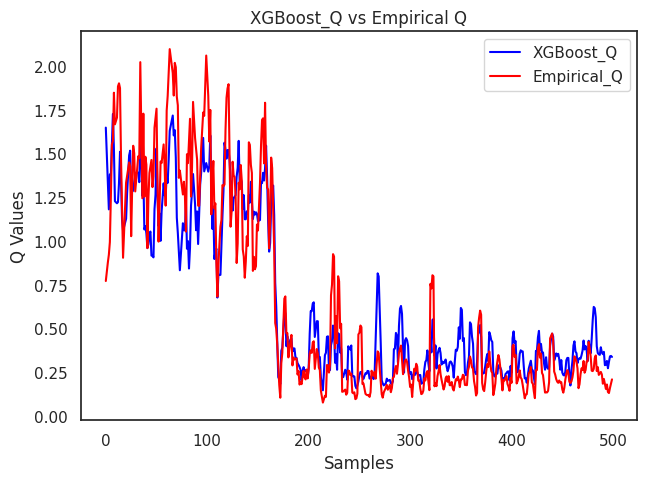

In [116]:
import matplotlib.pyplot as plt
import numpy as np

# Smooth the 'Q' (Synthesised) and 'Q_emp' (Empirical) data using a moving average
window_size = 4  # Adjust the window size as needed
smoothed_Q = data['Q_predicted_XGBoost'].rolling(window=window_size, min_periods=1).mean()
smoothed_Q_emp = data['Q_emp1'].rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed actual vs predicted data
plt.plot(smoothed_Q, color='blue', label='XGBoost_Q')  # Smoothed Synthesized Q
plt.plot(smoothed_Q_emp, color='red', label='Empirical_Q')  # Smoothed Empirical Q

# Adding labels and title
plt.xlabel('Samples')
plt.ylabel('Q Values')
plt.title('XGBoost_Q vs Empirical Q')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# blind data


=== Training Models with Default Parameters ===
Training Random Forest...
Random Forest - Train: R²=0.9793, MSE=0.0091, MAE=0.0685, RMSE=0.0953
Random Forest - Test: R²=0.8575, MSE=0.1238, MAE=0.2173, RMSE=0.3519
--------------------------------------------------
Training Extra Trees...
Extra Trees - Train: R²=1.0000, MSE=0.0000, MAE=0.0000, RMSE=0.0000
Extra Trees - Test: R²=0.8411, MSE=0.1381, MAE=0.2128, RMSE=0.3716
--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting - Train: R²=0.9961, MSE=0.0017, MAE=0.0253, RMSE=0.0414
Gradient Boosting - Test: R²=0.8181, MSE=0.1581, MAE=0.2257, RMSE=0.3977
--------------------------------------------------
Training XGBoost...
XGBoost - Train: R²=1.0000, MSE=0.0000, MAE=0.0010, RMSE=0.0015
XGBoost - Test: R²=0.8248, MSE=0.1523, MAE=0.1953, RMSE=0.3902
--------------------------------------------------

=== Training Models with Tuned Parameters ===
Tuning Random Forest...
Best parameters for Random F

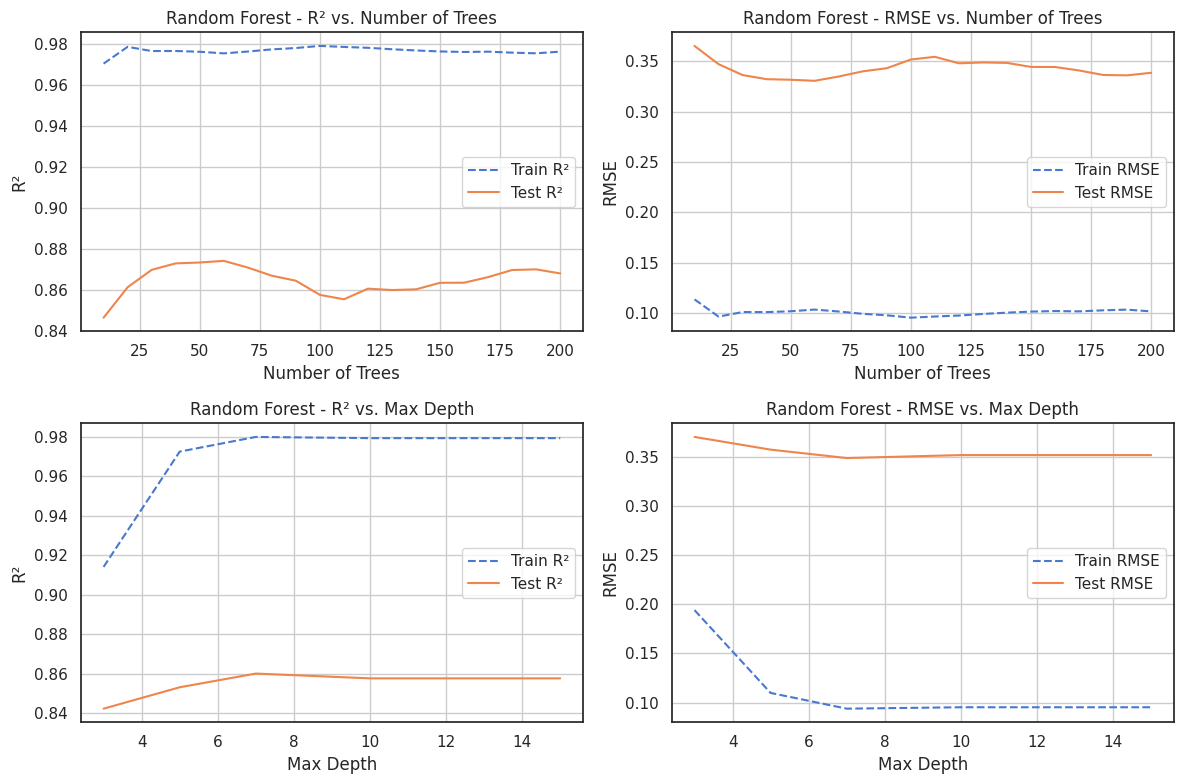

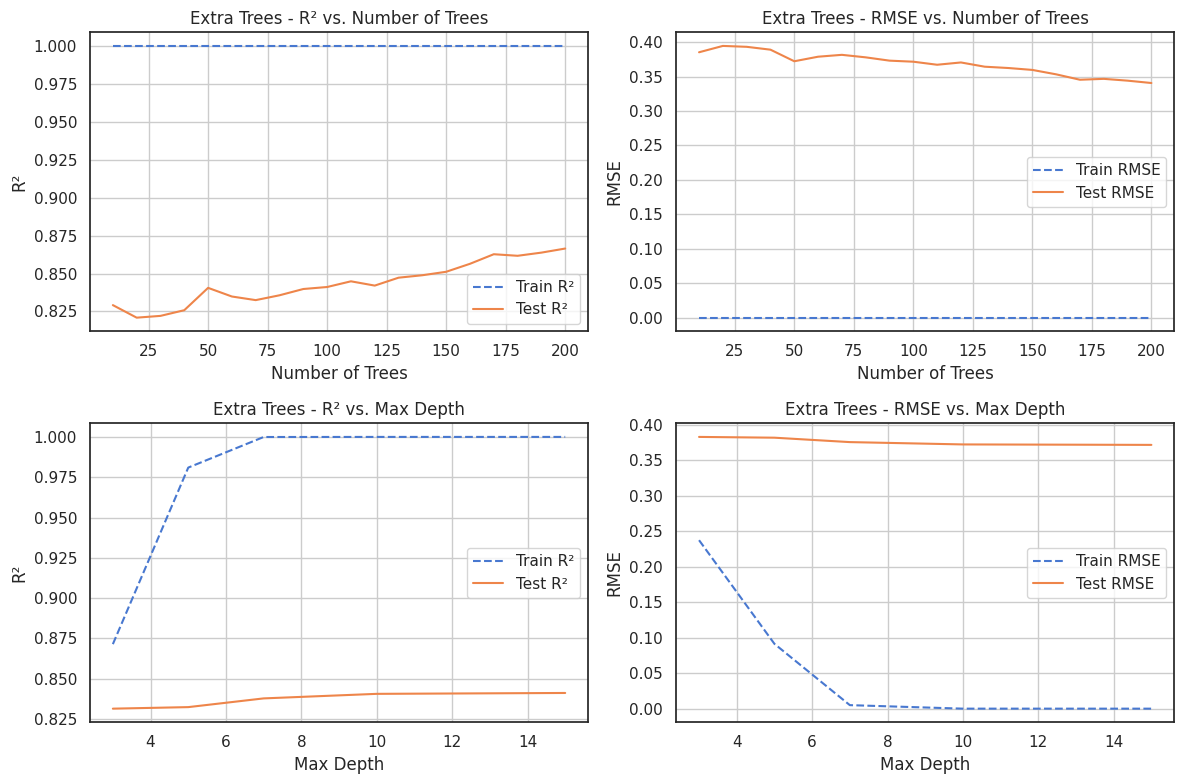

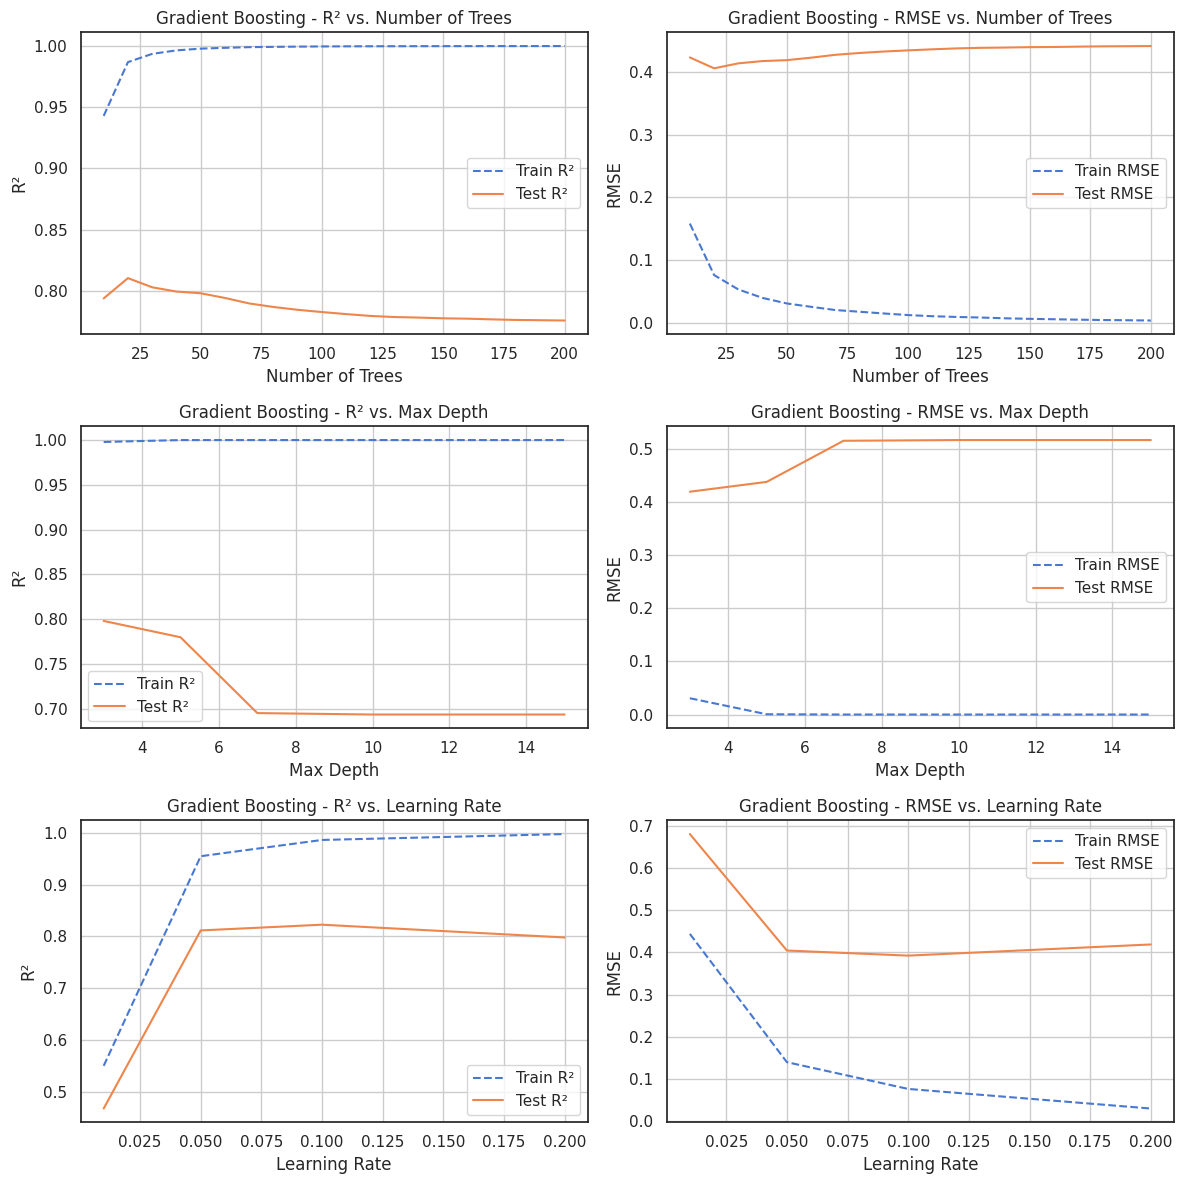

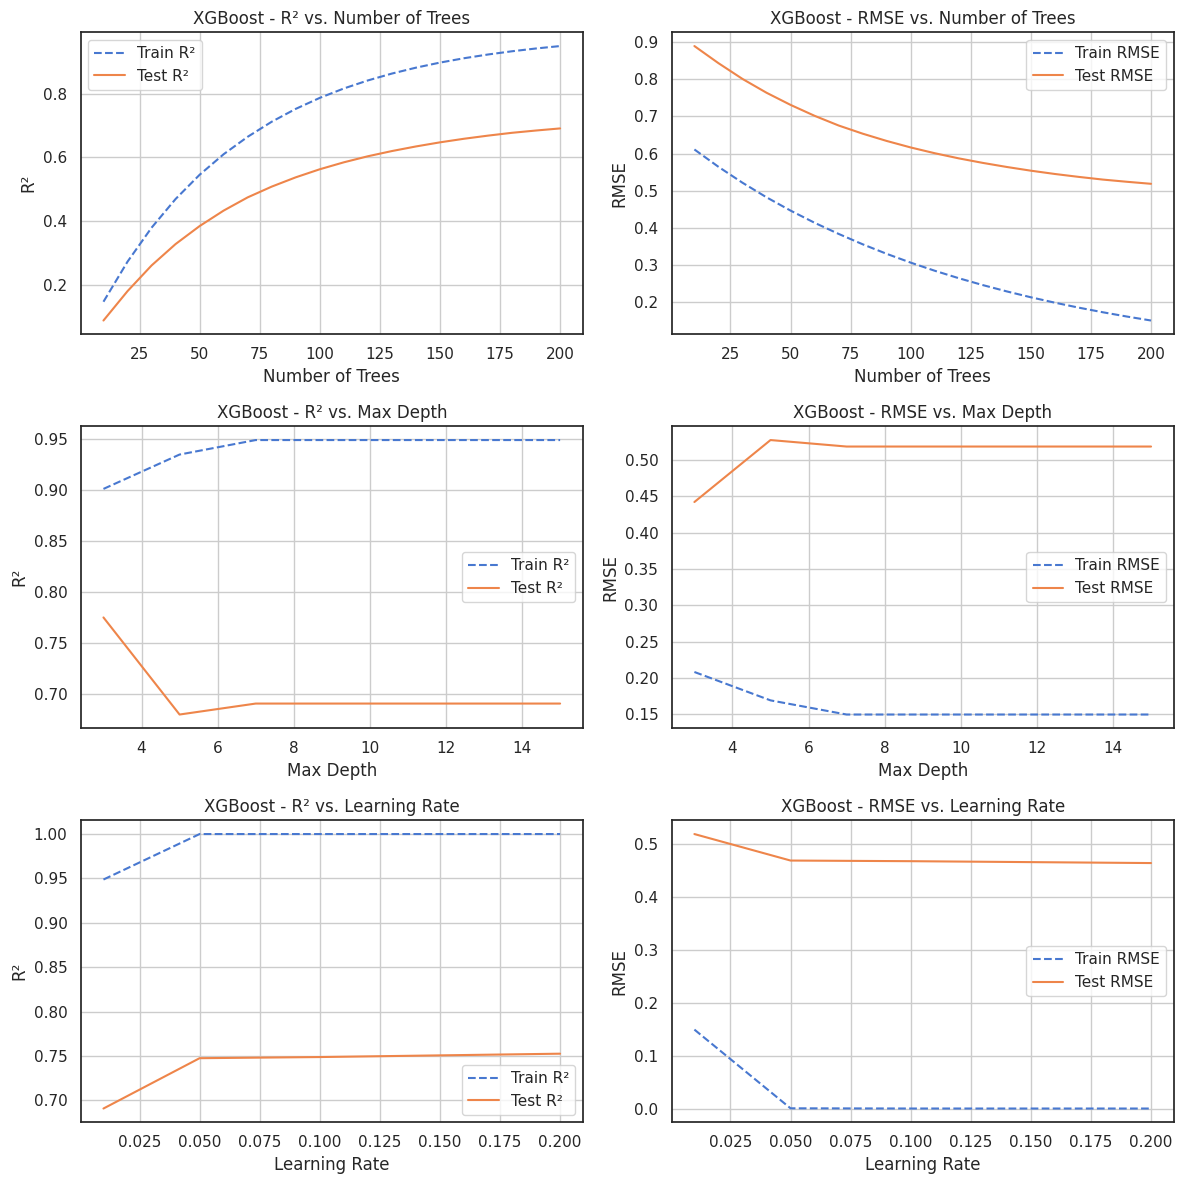

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PowerTransformer
from xgboost import XGBRegressor

# =====================================
# 1) Dataset and Preprocessing
# =====================================
features = ['RQD',	'Jn',	'Jr',	'Ja',	'Jw',	'SRF']
target = 'Q'

X = df[features].values
y = df[target].values

# Apply PowerTransformer to features
transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X)

# Train/test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_transformed, y, test_size=0.25, random_state=42
)

# =====================================
# 2) Helper Functions
# =====================================
def eval_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, mae, rmse

def get_rf_et_metrics(model_class, X_train, y_train, X_test, y_test, n_estimators_range, max_depth=None):
    train_r2, test_r2, train_rmse, test_rmse = [], [], [], []
    for n in n_estimators_range:
        model = model_class(n_estimators=n, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train, _, _, rmse_train = eval_metrics(y_train, y_train_pred)
        r2_test, _, _, rmse_test = eval_metrics(y_test, y_test_pred)
        train_r2.append(r2_train)
        test_r2.append(r2_test)
        train_rmse.append(rmse_train)
        test_rmse.append(rmse_test)
    return train_r2, test_r2, train_rmse, test_rmse

def get_gb_metrics(model_class, X_train, y_train, X_test, y_test, n_estimators_range, max_depth=None, learning_rate=0.1):
    train_r2, test_r2, train_rmse, test_rmse = [], [], [], []
    model = model_class(n_estimators=max(n_estimators_range), max_depth=max_depth, learning_rate=learning_rate, random_state=42)
    model.fit(X_train, y_train)
    for i, (y_train_pred, y_test_pred) in enumerate(zip(model.staged_predict(X_train), model.staged_predict(X_test))):
        if i + 1 in n_estimators_range:
            r2_train, _, _, rmse_train = eval_metrics(y_train, y_train_pred)
            r2_test, _, _, rmse_test = eval_metrics(y_test, y_test_pred)
            train_r2.append(r2_train)
            test_r2.append(r2_test)
            train_rmse.append(rmse_train)
            test_rmse.append(rmse_test)
    return train_r2, test_r2, train_rmse, test_rmse

def get_xgb_metrics(model_class, X_train, y_train, X_test, y_test, n_estimators_range, max_depth=None, learning_rate=0.1):
    train_r2, test_r2, train_rmse, test_rmse = [], [], [], []
    model = model_class(n_estimators=max(n_estimators_range), max_depth=max_depth, learning_rate=learning_rate,
                        objective='reg:squarederror', random_state=42, verbosity=0)
    model.fit(X_train, y_train)
    for i in n_estimators_range:
        y_train_pred = model.predict(X_train, iteration_range=(0, i))
        y_test_pred = model.predict(X_test, iteration_range=(0, i))
        r2_train, _, _, rmse_train = eval_metrics(y_train, y_train_pred)
        r2_test, _, _, rmse_test = eval_metrics(y_test, y_test_pred)
        train_r2.append(r2_train)
        test_r2.append(r2_test)
        train_rmse.append(rmse_train)
        test_rmse.append(rmse_test)
    return train_r2, test_r2, train_rmse, test_rmse

def get_metrics_vs_depth(model_class, X_train, y_train, X_test, y_test, max_depths, n_estimators=100, learning_rate=None):
    train_r2, test_r2, train_rmse, test_rmse = [], [], [], []
    for depth in max_depths:
        if model_class in [RandomForestRegressor, ExtraTreesRegressor]:
            model = model_class(n_estimators=n_estimators, max_depth=depth, random_state=42)
        elif model_class == XGBRegressor:
            model = model_class(n_estimators=n_estimators, max_depth=depth, learning_rate=learning_rate or 0.1,
                                objective='reg:squarederror', random_state=42, verbosity=0)
        else:  # GradientBoostingRegressor
            model = model_class(n_estimators=n_estimators, max_depth=depth, learning_rate=learning_rate or 0.1, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train, _, _, rmse_train = eval_metrics(y_train, y_train_pred)
        r2_test, _, _, rmse_test = eval_metrics(y_test, y_test_pred)
        train_r2.append(r2_train)
        test_r2.append(r2_test)
        train_rmse.append(rmse_train)
        test_rmse.append(rmse_test)
    return train_r2, test_r2, train_rmse, test_rmse

def get_metrics_vs_lr(model_class, X_train, y_train, X_test, y_test, learning_rates, n_estimators=100, max_depth=3):
    train_r2, test_r2, train_rmse, test_rmse = [], [], [], []
    for lr in learning_rates:
        if model_class == XGBRegressor:
            model = model_class(n_estimators=n_estimators, max_depth=max_depth, learning_rate=lr,
                                objective='reg:squarederror', random_state=42, verbosity=0)
        else:  # GradientBoostingRegressor
            model = model_class(n_estimators=n_estimators, max_depth=max_depth, learning_rate=lr, random_state=42)
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train, _, _, rmse_train = eval_metrics(y_train, y_train_pred)
        r2_test, _, _, rmse_test = eval_metrics(y_test, y_test_pred)
        train_r2.append(r2_train)
        test_r2.append(r2_test)
        train_rmse.append(rmse_train)
        test_rmse.append(rmse_test)
    return train_r2, test_r2, train_rmse, test_rmse

# =====================================
# 3) Train Models with Default Parameters
# =====================================
models_default = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Extra Trees': ExtraTreesRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

print("\n=== Training Models with Default Parameters ===")
default_metrics = {}
for name, model in models_default.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    r2_train, mse_train, mae_train, rmse_train = eval_metrics(y_train, y_pred_train)
    r2_test, mse_test, mae_test, rmse_test = eval_metrics(y_test, y_pred_test)
    default_metrics[name] = {
        'train': {'R2': r2_train, 'MSE': mse_train, 'MAE': mae_train, 'RMSE': rmse_train},
        'test': {'R2': r2_test, 'MSE': mse_test, 'MAE': mae_test, 'RMSE': rmse_test}
    }
    print(f"{name} - Train: R²={r2_train:.4f}, MSE={mse_train:.4f}, MAE={mae_train:.4f}, RMSE={rmse_train:.4f}")
    print(f"{name} - Test: R²={r2_test:.4f}, MSE={mse_test:.4f}, MAE={mae_test:.4f}, RMSE={rmse_test:.4f}")
    print("-" * 50)

# =====================================
# 4) Hyperparameter Tuning with GridSearchCV
# =====================================
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    'Extra Trees': {
        'n_estimators': [50, 100, 200],
        'max_depth': [5, 10, 15, None],
        'min_samples_split': [2, 5, 10]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    'XGBoost': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

models_tuned = {}
tuned_metrics = {}
print("\n=== Training Models with Tuned Parameters ===")
for name, model in models_default.items():
    print(f"Tuning {name}...")
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grids[name],
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)
    models_tuned[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate tuned model
    y_pred_train = grid_search.predict(X_train)
    y_pred_test = grid_search.predict(X_test)
    r2_train, mse_train, mae_train, rmse_train = eval_metrics(y_train, y_pred_train)
    r2_test, mse_test, mae_test, rmse_test = eval_metrics(y_test, y_pred_test)
    tuned_metrics[name] = {
        'train': {'R2': r2_train, 'MSE': mse_train, 'MAE': mae_train, 'RMSE': rmse_train},
        'test': {'R2': r2_test, 'MSE': mse_test, 'MAE': mae_test, 'RMSE': rmse_test}
    }
    print(f"{name} (Tuned) - Train: R²={r2_train:.4f}, MSE={mse_train:.4f}, MAE={mae_train:.4f}, RMSE={rmse_train:.4f}")
    print(f"{name} (Tuned) - Test: R²={r2_test:.4f}, MSE={mse_test:.4f}, MAE={mae_test:.4f}, RMSE={rmse_test:.4f}")
    print("-" * 50)

# =====================================
# 5) Compare Default vs. Tuned Performance
# =====================================
print("\n=== Default vs. Tuned Performance Comparison ===")
for name in models_default:
    print(f"\n{name}:")
    print(f"Default - Test R²: {default_metrics[name]['test']['R2']:.4f}, RMSE: {default_metrics[name]['test']['RMSE']:.4f}")
    print(f"Tuned   - Test R²: {tuned_metrics[name]['test']['R2']:.4f}, RMSE: {tuned_metrics[name]['test']['RMSE']:.4f}")

# =====================================
# 6) Fitting Curves for Tuned Models
# =====================================
n_estimators_range = range(10, 201, 10)
max_depths = [3, 5, 7, 10, 15]
learning_rates = [0.01, 0.05, 0.1, 0.2]

model_metrics = {
    'Random Forest': {'n_estimators': {}, 'max_depth': {}},
    'Extra Trees': {'n_estimators': {}, 'max_depth': {}},
    'Gradient Boosting': {'n_estimators': {}, 'max_depth': {}, 'learning_rate': {}},
    'XGBoost': {'n_estimators': {}, 'max_depth': {}, 'learning_rate': {}}
}

# Compute metrics for fitting curves
for name, model_class in [
    ('Random Forest', RandomForestRegressor),
    ('Extra Trees', ExtraTreesRegressor),
    ('Gradient Boosting', GradientBoostingRegressor),
    ('XGBoost', XGBRegressor)
]:
    # Use best parameters from tuning
    best_params = models_tuned[name].get_params()
    if name in ['Random Forest', 'Extra Trees']:
        train_r2, test_r2, train_rmse, test_rmse = get_rf_et_metrics(
            model_class, X_train, y_train, X_test, y_test, n_estimators_range,
            max_depth=best_params.get('max_depth', 10)
        )
        model_metrics[name]['n_estimators'] = {
            'range': n_estimators_range, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
        train_r2, test_r2, train_rmse, test_rmse = get_metrics_vs_depth(
            model_class, X_train, y_train, X_test, y_test, max_depths,
            n_estimators=best_params.get('n_estimators', 100)
        )
        model_metrics[name]['max_depth'] = {
            'range': max_depths, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
    elif name == 'Gradient Boosting':
        train_r2, test_r2, train_rmse, test_rmse = get_gb_metrics(
            model_class, X_train, y_train, X_test, y_test, n_estimators_range,
            max_depth=best_params.get('max_depth', 3), learning_rate=best_params.get('learning_rate', 0.1)
        )
        model_metrics[name]['n_estimators'] = {
            'range': n_estimators_range, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
        train_r2, test_r2, train_rmse, test_rmse = get_metrics_vs_depth(
            model_class, X_train, y_train, X_test, y_test, max_depths,
            n_estimators=best_params.get('n_estimators', 100), learning_rate=best_params.get('learning_rate', 0.1)
        )
        model_metrics[name]['max_depth'] = {
            'range': max_depths, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
        train_r2, test_r2, train_rmse, test_rmse = get_metrics_vs_lr(
            model_class, X_train, y_train, X_test, y_test, learning_rates,
            n_estimators=best_params.get('n_estimators', 100), max_depth=best_params.get('max_depth', 3)
        )
        model_metrics[name]['learning_rate'] = {
            'range': learning_rates, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
    elif name == 'XGBoost':
        train_r2, test_r2, train_rmse, test_rmse = get_xgb_metrics(
            model_class, X_train, y_train, X_test, y_test, n_estimators_range,
            max_depth=best_params.get('max_depth', 3), learning_rate=best_params.get('learning_rate', 0.1)
        )
        model_metrics[name]['n_estimators'] = {
            'range': n_estimators_range, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
        train_r2, test_r2, train_rmse, test_rmse = get_metrics_vs_depth(
            model_class, X_train, y_train, X_test, y_test, max_depths,
            n_estimators=best_params.get('n_estimators', 100), learning_rate=best_params.get('learning_rate', 0.1)
        )
        model_metrics[name]['max_depth'] = {
            'range': max_depths, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }
        train_r2, test_r2, train_rmse, test_rmse = get_metrics_vs_lr(
            model_class, X_train, y_train, X_test, y_test, learning_rates,
            n_estimators=best_params.get('n_estimators', 100), max_depth=best_params.get('max_depth', 3)
        )
        model_metrics[name]['learning_rate'] = {
            'range': learning_rates, 'train_r2': train_r2, 'test_r2': test_r2,
            'train_rmse': train_rmse, 'test_rmse': test_rmse
        }

# Plot fitting curves
for name, metrics in model_metrics.items():
    if name in ['Random Forest', 'Extra Trees']:
        fig, axes = plt.subplots(2, 2, figsize=(12, 8))
        axes[0, 0].plot(metrics['n_estimators']['range'], metrics['n_estimators']['train_r2'], '--', label='Train R²')
        axes[0, 0].plot(metrics['n_estimators']['range'], metrics['n_estimators']['test_r2'], label='Test R²')
        axes[0, 0].set_title(f'{name} - R² vs. Number of Trees')
        axes[0, 0].set_xlabel('Number of Trees')
        axes[0, 0].set_ylabel('R²')
        axes[0, 0].grid(True)
        axes[0, 0].legend()

        axes[0, 1].plot(metrics['n_estimators']['range'], metrics['n_estimators']['train_rmse'], '--', label='Train RMSE')
        axes[0, 1].plot(metrics['n_estimators']['range'], metrics['n_estimators']['test_rmse'], label='Test RMSE')
        axes[0, 1].set_title(f'{name} - RMSE vs. Number of Trees')
        axes[0, 1].set_xlabel('Number of Trees')
        axes[0, 1].set_ylabel('RMSE')
        axes[0, 1].grid(True)
        axes[0, 1].legend()

        axes[1, 0].plot(metrics['max_depth']['range'], metrics['max_depth']['train_r2'], '--', label='Train R²')
        axes[1, 0].plot(metrics['max_depth']['range'], metrics['max_depth']['test_r2'], label='Test R²')
        axes[1, 0].set_title(f'{name} - R² vs. Max Depth')
        axes[1, 0].set_xlabel('Max Depth')
        axes[1, 0].set_ylabel('R²')
        axes[1, 0].grid(True)
        axes[1, 0].legend()

        axes[1, 1].plot(metrics['max_depth']['range'], metrics['max_depth']['train_rmse'], '--', label='Train RMSE')
        axes[1, 1].plot(metrics['max_depth']['range'], metrics['max_depth']['test_rmse'], label='Test RMSE')
        axes[1, 1].set_title(f'{name} - RMSE vs. Max Depth')
        axes[1, 1].set_xlabel('Max Depth')
        axes[1, 1].set_ylabel('RMSE')
        axes[1, 1].grid(True)
        axes[1, 1].legend()

    elif name in ['Gradient Boosting', 'XGBoost']:
        fig, axes = plt.subplots(3, 2, figsize=(12, 12))
        axes[0, 0].plot(metrics['n_estimators']['range'], metrics['n_estimators']['train_r2'], '--', label='Train R²')
        axes[0, 0].plot(metrics['n_estimators']['range'], metrics['n_estimators']['test_r2'], label='Test R²')
        axes[0, 0].set_title(f'{name} - R² vs. Number of Trees')
        axes[0, 0].set_xlabel('Number of Trees')
        axes[0, 0].set_ylabel('R²')
        axes[0, 0].grid(True)
        axes[0, 0].legend()

        axes[0, 1].plot(metrics['n_estimators']['range'], metrics['n_estimators']['train_rmse'], '--', label='Train RMSE')
        axes[0, 1].plot(metrics['n_estimators']['range'], metrics['n_estimators']['test_rmse'], label='Test RMSE')
        axes[0, 1].set_title(f'{name} - RMSE vs. Number of Trees')
        axes[0, 1].set_xlabel('Number of Trees')
        axes[0, 1].set_ylabel('RMSE')
        axes[0, 1].grid(True)
        axes[0, 1].legend()

        axes[1, 0].plot(metrics['max_depth']['range'], metrics['max_depth']['train_r2'], '--', label='Train R²')
        axes[1, 0].plot(metrics['max_depth']['range'], metrics['max_depth']['test_r2'], label='Test R²')
        axes[1, 0].set_title(f'{name} - R² vs. Max Depth')
        axes[1, 0].set_xlabel('Max Depth')
        axes[1, 0].set_ylabel('R²')
        axes[1, 0].grid(True)
        axes[1, 0].legend()

        axes[1, 1].plot(metrics['max_depth']['range'], metrics['max_depth']['train_rmse'], '--', label='Train RMSE')
        axes[1, 1].plot(metrics['max_depth']['range'], metrics['max_depth']['test_rmse'], label='Test RMSE')
        axes[1, 1].set_title(f'{name} - RMSE vs. Max Depth')
        axes[1, 1].set_xlabel('Max Depth')
        axes[1, 1].set_ylabel('RMSE')
        axes[1, 1].grid(True)
        axes[1, 1].legend()

        axes[2, 0].plot(metrics['learning_rate']['range'], metrics['learning_rate']['train_r2'], '--', label='Train R²')
        axes[2, 0].plot(metrics['learning_rate']['range'], metrics['learning_rate']['test_r2'], label='Test R²')
        axes[2, 0].set_title(f'{name} - R² vs. Learning Rate')
        axes[2, 0].set_xlabel('Learning Rate')
        axes[2, 0].set_ylabel('R²')
        axes[2, 0].grid(True)
        axes[2, 0].legend()

        axes[2, 1].plot(metrics['learning_rate']['range'], metrics['learning_rate']['train_rmse'], '--', label='Train RMSE')
        axes[2, 1].plot(metrics['learning_rate']['range'], metrics['learning_rate']['test_rmse'], label='Test RMSE')
        axes[2, 1].set_title(f'{name} - RMSE vs. Learning Rate')
        axes[2, 1].set_xlabel('Learning Rate')
        axes[2, 1].set_ylabel('RMSE')
        axes[2, 1].grid(True)
        axes[2, 1].legend()

    plt.tight_layout()
    plt.show()